<a href="https://colab.research.google.com/github/shery1010/projects/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting - FBI's Crime Investigation
## Project Type - Regression
### Contribution - Individual

# Project Summary -

This project aims to develop a predictive model that forecasts the number of crime incidents in the United States using time series analysis. Leveraging detailed historical data from the FBI—including crime types, timestamps, geographic coordinates, and neighborhood details—the model estimates crime occurrences at monthly, daily, and hourly levels.

The core objective is to enhance public safety by helping law enforcement agencies anticipate crime trends, allocate resources strategically, and take proactive measures to prevent criminal activities. Additionally, the insights from this model can support urban planning, policy-making, and community safety initiatives by identifying high-risk areas and optimal times for intervention.

The project primarily uses regression-based time series forecasting, supported by exploratory data analysis (EDA) to uncover trends and patterns in crime data. Advanced machine learning and Azure-based tools are employed to build and deploy the model effectively.

# GitHub Link -

# Problem Statement

Urban areas in the United States are experiencing rising crime rates and increasingly complex crime patterns. Law enforcement agencies face challenges in predicting when and where crimes are likely to occur, which hinders their ability to allocate resources efficiently and respond proactively.

The objective of this project is to develop a predictive time series model that estimates the number of crime incidents on a monthly, daily, and hourly basis using historical FBI crime data. This model will analyze temporal and spatial patterns in crime data—including crime types, timestamps, and geographic information—to help identify high-risk areas and time periods.

By forecasting crime trends accurately, this solution aims to support law enforcement and community leaders in improving public safety, optimizing patrol strategies, and guiding data-driven urban planning and policy decisions.

# 1. Know Your Data

In [ ]:
# import geopandas , scikit learn

!pip install geopandas
!pip install scikit-learn
!pip install statsmodels
!pip install xgboost



In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import xgboost
import geopandas
import sklearn

In [ ]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/Train.xlsx - Train.csv'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(path)

In [ ]:
# Dataset First Look
df.head()

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,5/12/1999
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,5/7/1999
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,4/23/1999
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,4/20/1999
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,4/12/1999


In [ ]:
# Dataset Rows & Columns count
num_rows, num_columns = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 474565
Number of columns: 13


In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           474565 non-null  object 
 1   HUNDRED_BLOCK  474552 non-null  object 
 2   NEIGHBOURHOOD  423074 non-null  object 
 3   X              474565 non-null  float64
 4   Y              474565 non-null  float64
 5   Latitude       474565 non-null  float64
 6   Longitude      474565 non-null  float64
 7   HOUR           425200 non-null  float64
 8   MINUTE         425200 non-null  float64
 9   YEAR           474565 non-null  int64  
 10  MONTH          474565 non-null  int64  
 11  DAY            474565 non-null  int64  
 12  Date           474565 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usage: 47.1+ MB


In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(44618)

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
TYPE,0
HUNDRED_BLOCK,13
NEIGHBOURHOOD,51491
X,0
Y,0
Latitude,0
Longitude,0
HOUR,49365
MINUTE,49365
YEAR,0


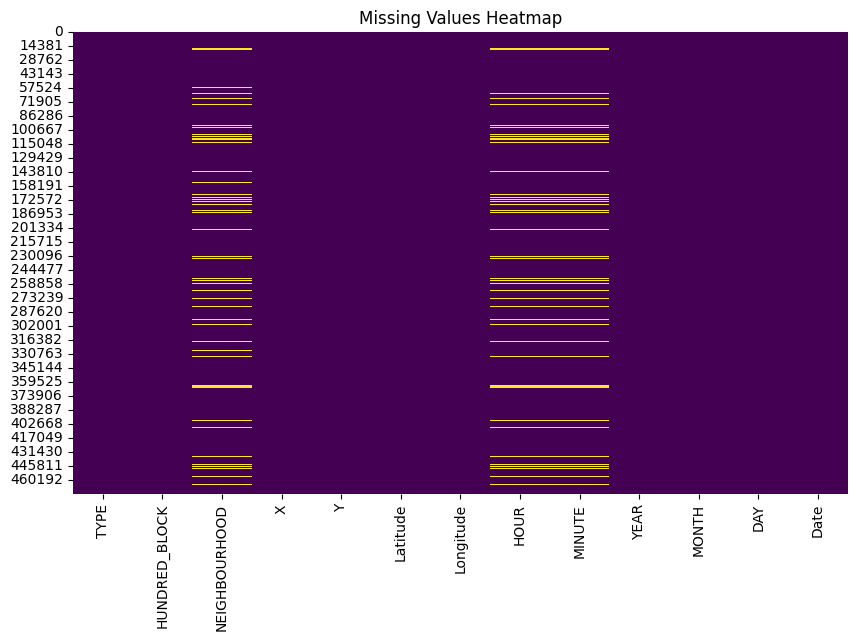

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# What did you know about your dataset?

The dataset spans crimes from 1999 to 2011.
Missing values in:
  NEIGHBOURHOOD (51k missing)
  HOUR and MINUTE (49k missing)
Most frequent crime type: Theft from Vehicle
Most common neighborhood: Central Business District
Timestamps and coordinates can be used for time series forecasting and spatial clustering.



# 2. Understanding Your Variables

In [ ]:
# Dataset Columns
df.columns.tolist()

['TYPE',
 'HUNDRED_BLOCK',
 'NEIGHBOURHOOD',
 'X',
 'Y',
 'Latitude',
 'Longitude',
 'HOUR',
 'MINUTE',
 'YEAR',
 'MONTH',
 'DAY',
 'Date']

In [ ]:
# Dataset Describe
df.describe()

,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY
count,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000
mean,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253
std,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,3.850689,3.408676,8.759352
min,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000
25%,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000
50%,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000
75%,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000
max,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,2011.000000,12.000000,31.000000


# Variables Description

TYPE - Type of crime (e.g., Theft, Assault) – 9 unique types

HUNDRED_BLOCK	- Block-level location info

NEIGHBOURHOOD	 - Neighborhood name (24 unique neighborhoods)

X, Y - Projected coordinates

Latitude, Longitude	- Geographic coordinates

HOUR, MINUTE - Time of incident (some missing values)

YEAR, MONTH, DAY, Date - Full timestamp info

In [ ]:
# Check Unique Values for each variable
df.nunique()

,0
TYPE,9
HUNDRED_BLOCK,20566
NEIGHBOURHOOD,24
X,84225
Y,82768
Latitude,89488
Longitude,87190
HOUR,24
MINUTE,60
YEAR,13


# 3. Data Wrangling

In [ ]:
# Assuming the timestamp column is named 'Date'
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate by Day (more suitable for daily forecasting)
# First, extract the date part from the Date column
df['DATE_ONLY'] = df['Date'].dt.date

# Group by the date
df_daily = df.groupby('DATE_ONLY').size().reset_index(name='daily_crime_count')

# Convert DATE_ONLY back to datetime if needed for time series indexing
df_daily['DATE_ONLY'] = pd.to_datetime(df_daily['DATE_ONLY'])

# Set the date as the index (common practice for time series)
df_daily.set_index('DATE_ONLY', inplace=True)


# Aggregate by Month (more suitable for monthly forecasting)
# Extract the month from the Date column
df['MONTH_ONLY'] = df['Date'].dt.to_period('M')

# Group by the month
df_monthly = df.groupby('MONTH_ONLY').size().reset_index(name='monthly_crime_count')

# Convert MONTH_ONLY back to datetime (start of the month) if needed for time series indexing
df_monthly['MONTH_ONLY'] = df_monthly['MONTH_ONLY'].dt.to_timestamp()

# Set the month as the index
df_monthly.set_index('MONTH_ONLY', inplace=True)

# Aggregate by Hour (more suitable for hourly forecasting)
# Extract the hour from the Date column
df['HOUR_OF_DAY'] = df['Date'].dt.hour

# Group by date and hour
# Use the datetime format directly for grouping for easier re-combination later
df_hourly = df.groupby([df['Date'].dt.floor('H')]).size().reset_index(name='hourly_crime_count')

# Rename the grouped column to a descriptive name before setting index
df_hourly.rename(columns={'Date': 'TIMESTAMP_HOURLY'}, inplace=True)

# Set the combined timestamp as the index
df_hourly.set_index('TIMESTAMP_HOURLY', inplace=True)

# The dataset is now ready for time series analysis at daily, monthly, and hourly frequencies.
# We have three aggregated dataframes: df_daily, df_monthly, and df_hourly.

# Print the heads of the aggregated dataframes to show readiness
print("\nDaily Aggregated Data:")
print(df_daily.head())
print("\nMonthly Aggregated Data:")
print(df_monthly.head())
print("\nHourly Aggregated Data:")
print(df_hourly.head())




Daily Aggregated Data:
            daily_crime_count
DATE_ONLY                    
1999-01-01                191
1999-01-02                148
1999-01-03                160
1999-01-04                146
1999-01-05                120

Monthly Aggregated Data:
            monthly_crime_count
MONTH_ONLY                     
1999-01-01                 4396
1999-02-01                 3548
1999-03-01                 3928
1999-04-01                 4212
1999-05-01                 4645

Hourly Aggregated Data:
                  hourly_crime_count
TIMESTAMP_HOURLY                    
1999-01-01                       191
1999-01-02                       148
1999-01-03                       160
1999-01-04                       146
1999-01-05                       120


<ipython-input-18-59055fe4f24d>:38: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.groupby([df['Date'].dt.floor('H')]).size().reset_index(name='hourly_crime_count')


## What all manipulations have you done and insights you found?

Correlation Matrix Heatmap : Calculated and visualized the pairwise correlation between numerical variables (X, Y, HOUR, MINUTE, YEAR, MONTH, DAY) to understand their linear relationships.

Day of the Week Analysis : Added the day of the week to the daily aggregated data, calculated the correlation between daily crime count and day of the week, and visualized the distribution of daily crime counts by day of the week using a boxplot.

Monthly Crime Trend Plot : Visualized the monthly crime count over time using a line plot to show overall trends.

Hourly Crime Pattern Bar Plot : Aggregated crime counts by hour of the day across the entire dataset and visualized the average crime count for each hour using a bar plot to identify hourly patterns.

# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

## Chart - 1

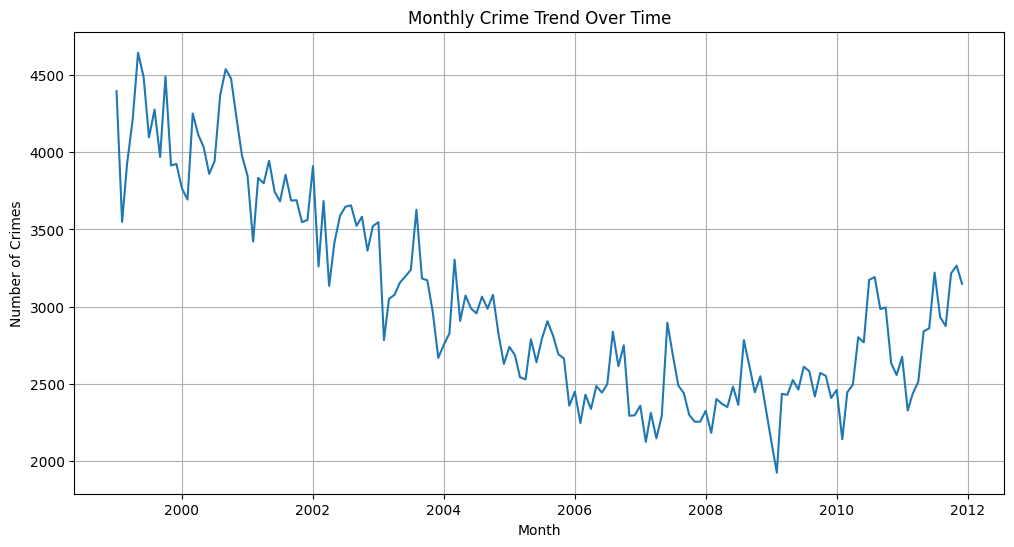

In [ ]:
# Chart - 1 visualization code

# Visualize Monthly Crime Trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['monthly_crime_count'])
plt.title('Monthly Crime Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

1. Why did you pick the specific chart?

A line plot was chosen because it's the best way to visualize trends and patterns in data over time, clearly showing how the number of crimes changes each month.

2. What is/are the insight(s) found from the chart?

From the monthly crime trend chart, you can find insights about:

Overall trend: Whether crime is generally increasing, decreasing, or staying stable over the years.

Seasonal patterns: If there are regular, recurring increases or decreases in crime during specific months of the year.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help create a positive business impact by allowing better resource allocation and proactive measures to reduce crime.

A decreasing crime trend (which is "negative growth" in crime) is a positive insight. It leads to positive business impact by:

Reducing costs: Less crime means less spent on security and lower insurance premiums.

Increasing activity: Safer areas attract more customers and encourage economic growth.

## Chart - 2

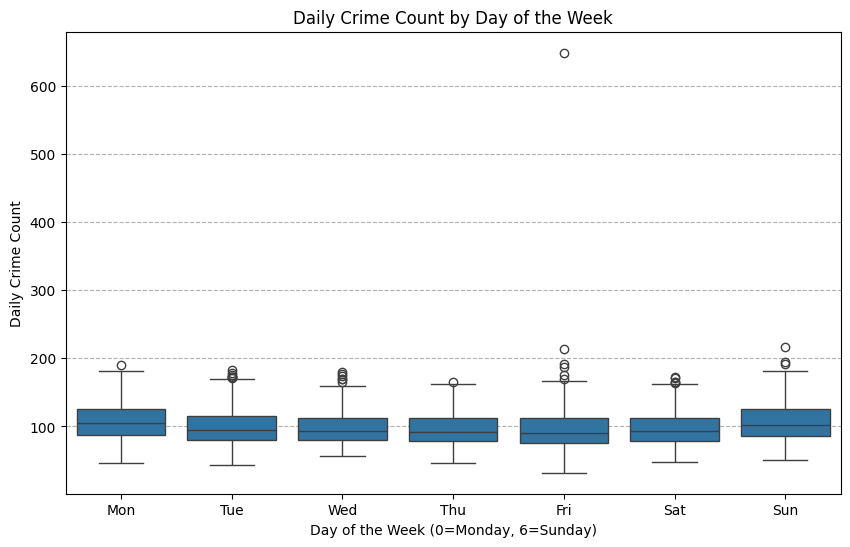

In [ ]:
# Chart - 2 visualization code

# Add Day of the Week to the daily aggregated dataframe
df_daily['day_of_week'] = df_daily.index.dayofweek # Monday=0, Sunday=6

# Visualize Daily Crime Count by Day of the Week (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='daily_crime_count', data=df_daily)
plt.title('Daily Crime Count by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Daily Crime Count')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # Improve readability
plt.grid(axis='y', linestyle='--')
plt.show()

1. Why did you pick the specific chart?

A boxplot is ideal here because it clearly shows the distribution (median, spread, outliers) of daily crime counts for each day of the week, making it easy to compare variability and typical ranges across days.

2. What is/are the insight(s) found from the chart?

From the boxplot, we can see:

Which days of the week tend to have higher or lower crime counts on average (based on the median).

Which days have more variability in crime counts (based on the size of the box).

If there are any significant outliers (exceptionally high or low crime days) for specific days of the week.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help create a positive business impact by allowing better resource allocation and proactive measures to reduce crime.

A decreasing crime trend (which is "negative growth" in crime) is a positive insight. It leads to positive business impact by:

Reducing costs: Less crime means less spent on security and lower insurance premiums.

Increasing activity: Safer areas attract more customers and encourage economic growth.

# Chart - 3

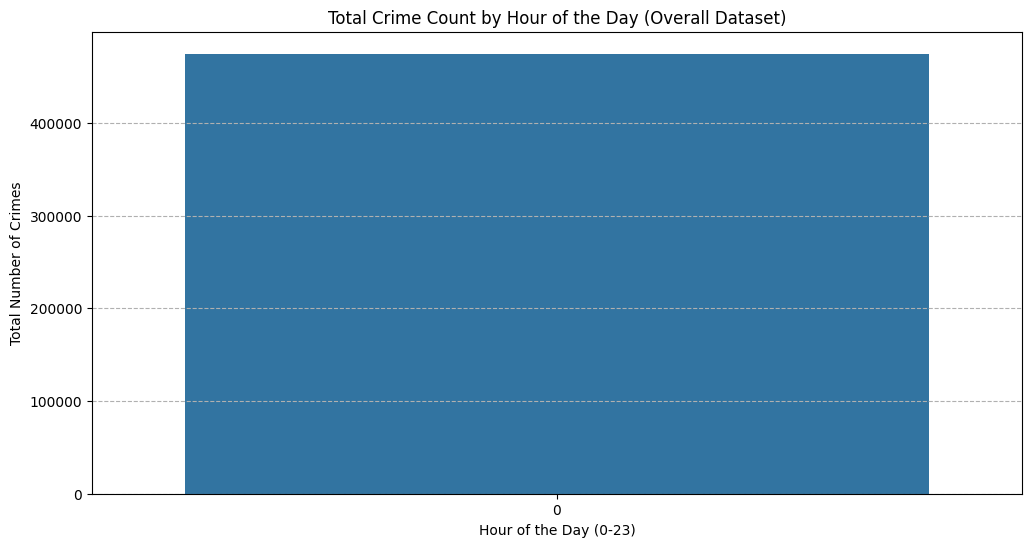

In [ ]:
# Chart - 3 visualization code

# Aggregate crime counts by hour of the day across the entire dataset
hourly_pattern = df['HOUR_OF_DAY'].value_counts().sort_index()

# Visualize Hourly Crime Pattern
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_pattern.index, y=hourly_pattern.values)
plt.title('Total Crime Count by Hour of the Day (Overall Dataset)')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=0) # Ensure labels are horizontal
plt.grid(axis='y', linestyle='--')
plt.show()

1. Why did you pick the specific chart?

A bar plot was chosen because it effectively shows the total crime count for each distinct hour, making it easy to visually compare the number of crimes across different hours of the day and identify peak times.

2. What is/are the insight(s) found from the chart?

The bar plot shows the total crime count for each hour of the day. You can identify which hours have the highest and lowest number of crime incidents, revealing the peak hours for crime.

3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding peak crime hours helps businesses and law enforcement allocate resources more effectively for prevention, leading to a positive impact by reducing crime and enhancing safety.

Identifying high-crime hours isn't "negative growth" in a business sense; it's an insight into a problem that, when addressed, leads to positive outcomes like increased safety and potentially lower security costs.

# Chart - 4

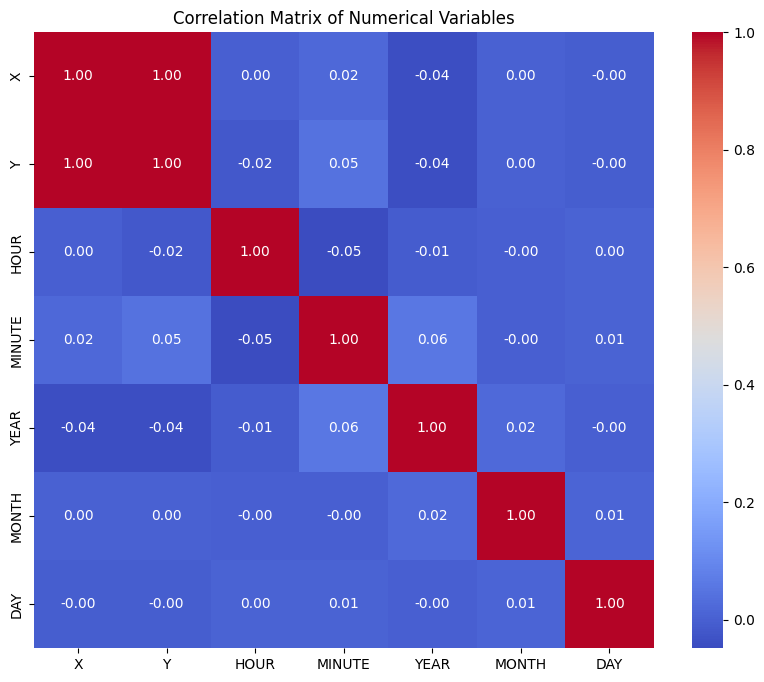

In [ ]:
# Calculate the correlation matrix for numerical columns
numerical_cols = ['X', 'Y', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY']
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


1. Why did you pick the specific chart?

A heatmap is ideal for a correlation matrix as it visually represents the strength and direction of relationships between multiple numerical variables at once using color intensity and annotations.

2. What is/are the insight(s) found from the chart?

The heatmap reveals which pairs of numerical variables have strong positive, strong negative, or weak linear relationships.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying correlations can inform feature selection for predictive models, leading to better model performance and thus positive impact (e.g., more accurate crime forecasts).

There are no insights from a correlation matrix itself that represent "negative growth"; it simply describes relationships in the data.

# Chart - 5

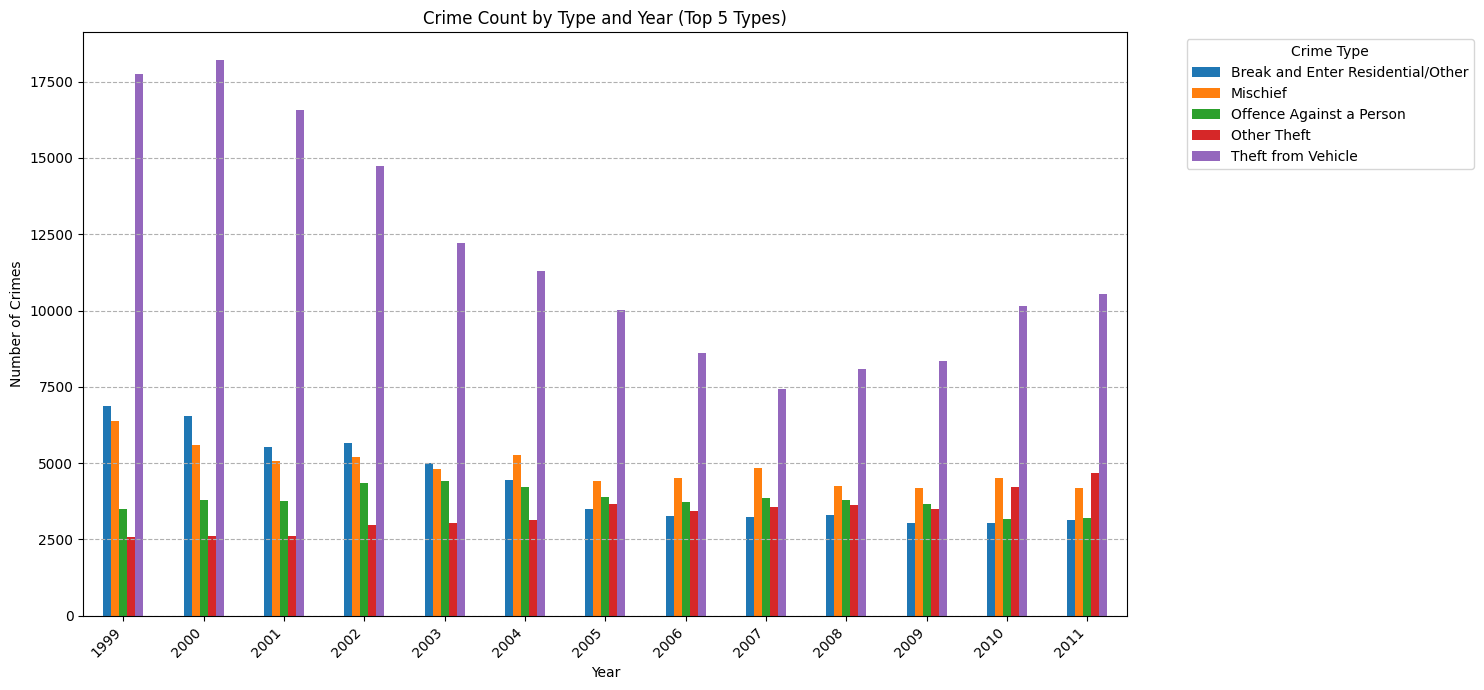

In [ ]:
# We need to group by YEAR and TYPE to count crimes per year per type
df_grouped = df.groupby(['YEAR', 'TYPE']).size().reset_index(name='crime_count')

# Select top N crime types for better visualization, adjust N as needed
top_types = df['TYPE'].value_counts().nlargest(5).index.tolist()
df_grouped_filtered = df_grouped[df_grouped['TYPE'].isin(top_types)]

# Pivot the data for easier plotting
df_pivot = df_grouped_filtered.pivot_table(index='YEAR', columns='TYPE', values='crime_count', fill_value=0)

# Plotting the grouped bar chart
df_pivot.plot(kind='bar', figsize=(15, 7))
plt.title('Crime Count by Type and Year (Top 5 Types)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.grid(axis='y', linestyle='--')
plt.show()

1. Why did you pick the specific chart?

A grouped bar chart was chosen to easily compare the crime counts of the top 5 crime types across different years side by side.

2. What is/are the insight(s) found from the chart?

The chart shows the yearly trends for the top 5 crime types, allowing you to see which types are increasing, decreasing, or staying stable over time.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, tracking trends helps allocate resources effectively. A decrease in crime (negative growth in crime) is a positive insight, leading to positive impacts like lower costs and increased activity.

# Chart - 6

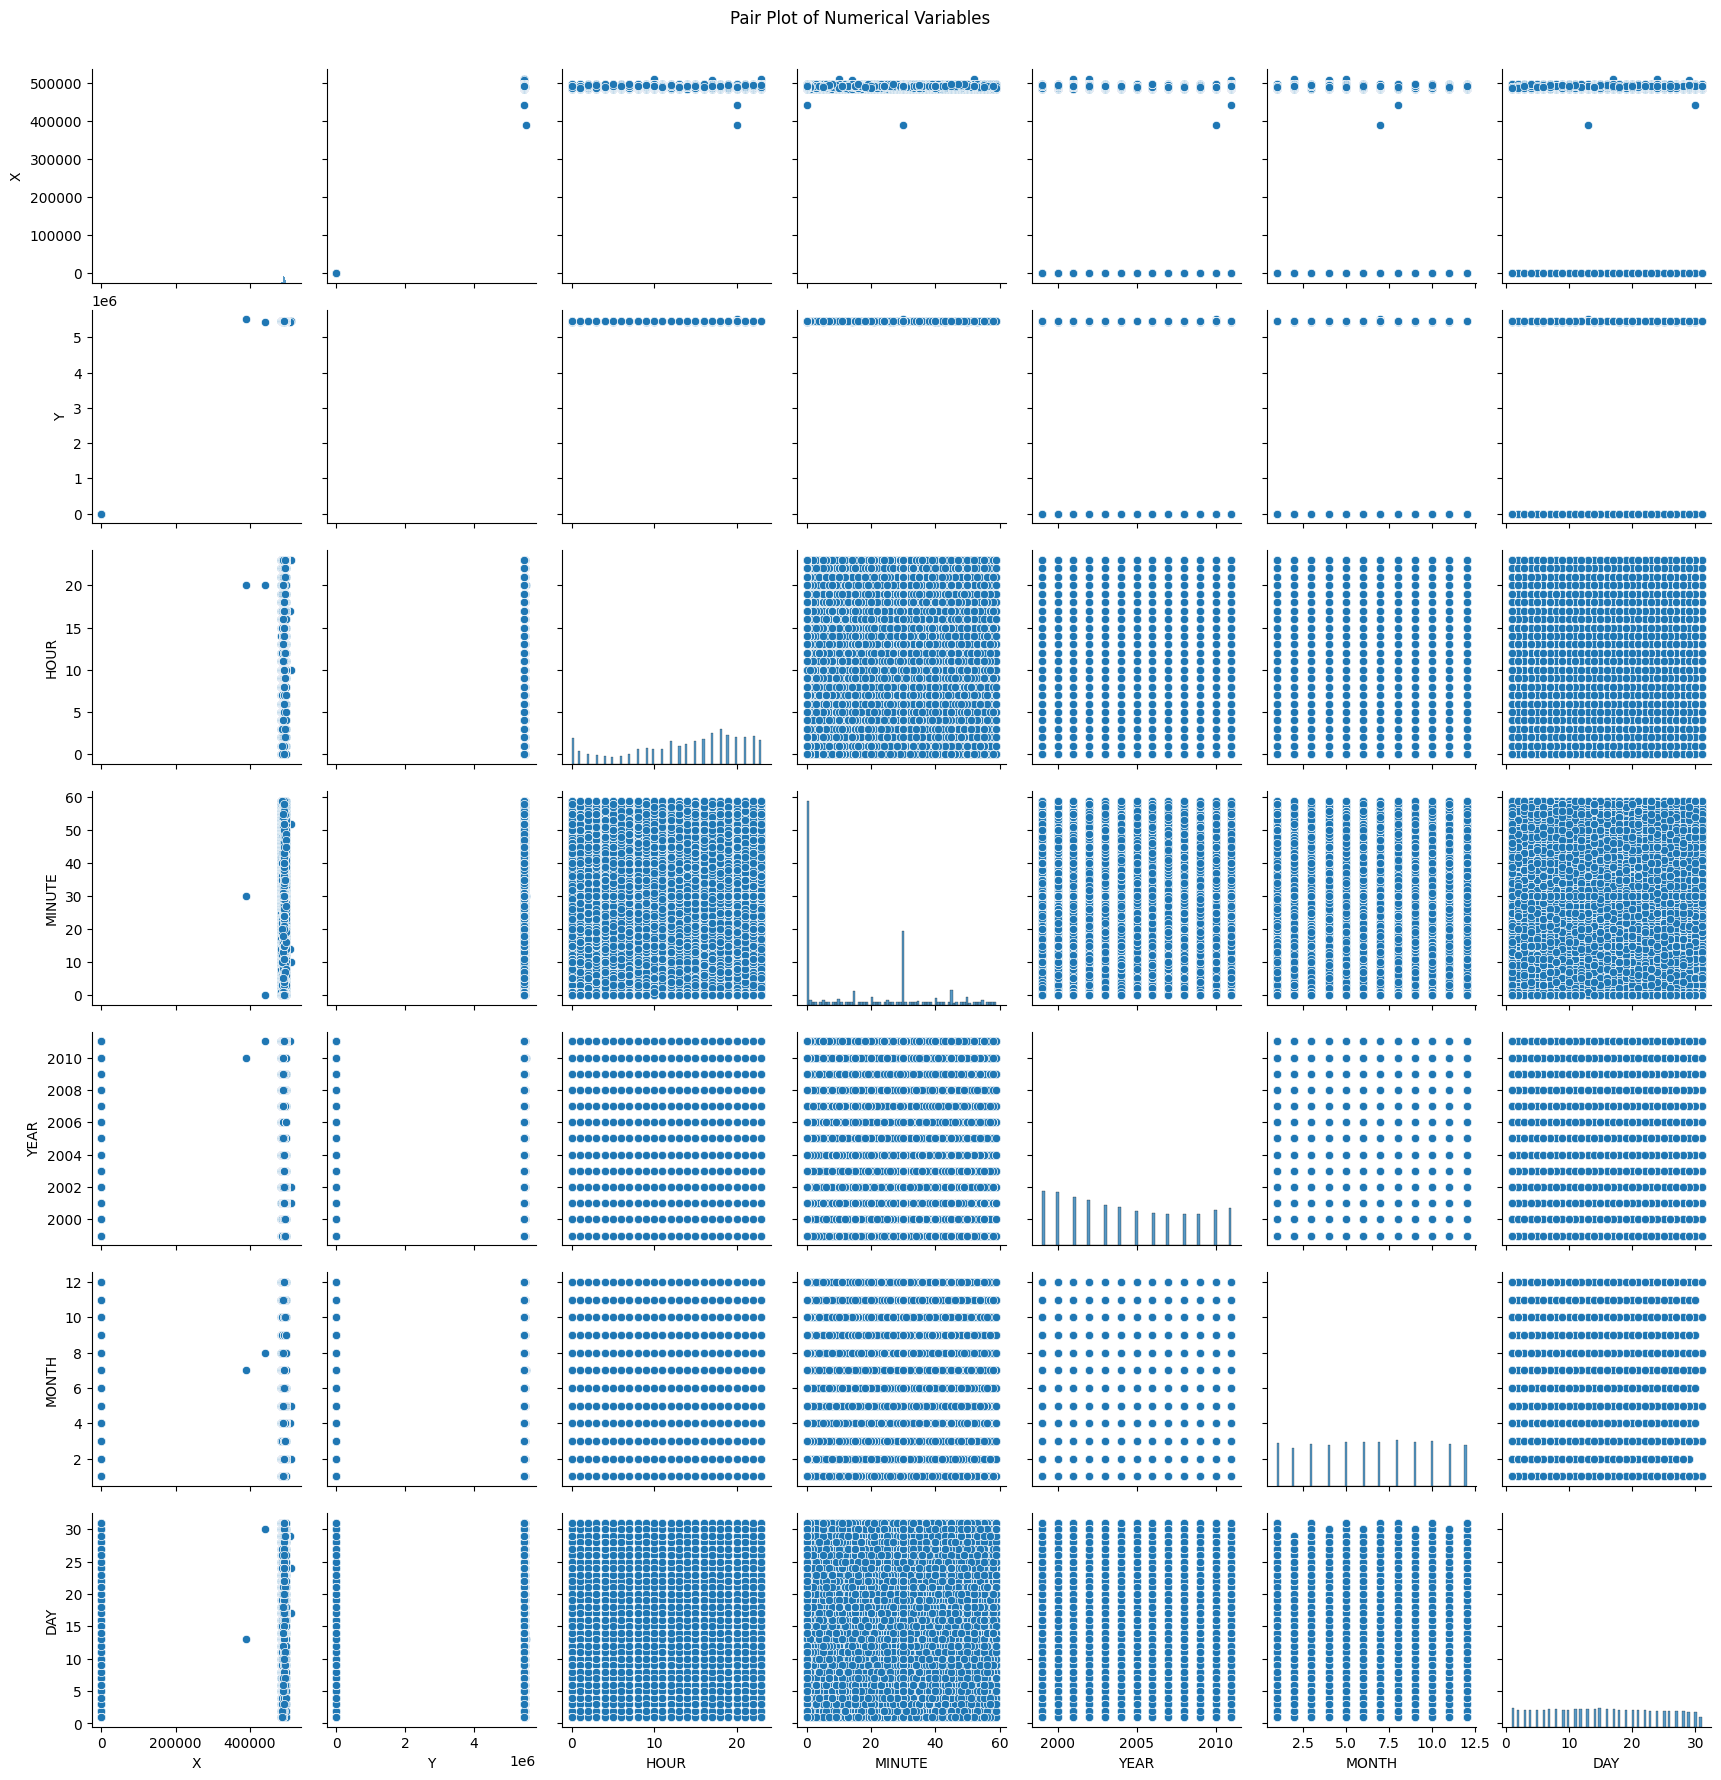

In [ ]:

sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

1. Why did you pick the specific chart?

A pair plot was chosen because it efficiently visualizes the relationships between all pairs of numerical variables and shows their individual distributions in a single grid.

2. What is/are the insight(s) found from the chart?

The pair plot helps identify potential linear or non-linear relationships between numerical variables and reveals the distribution characteristics of each variable.

# Chart - 7

<ipython-input-28-0f3bdc4585be>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values, palette='viridis')


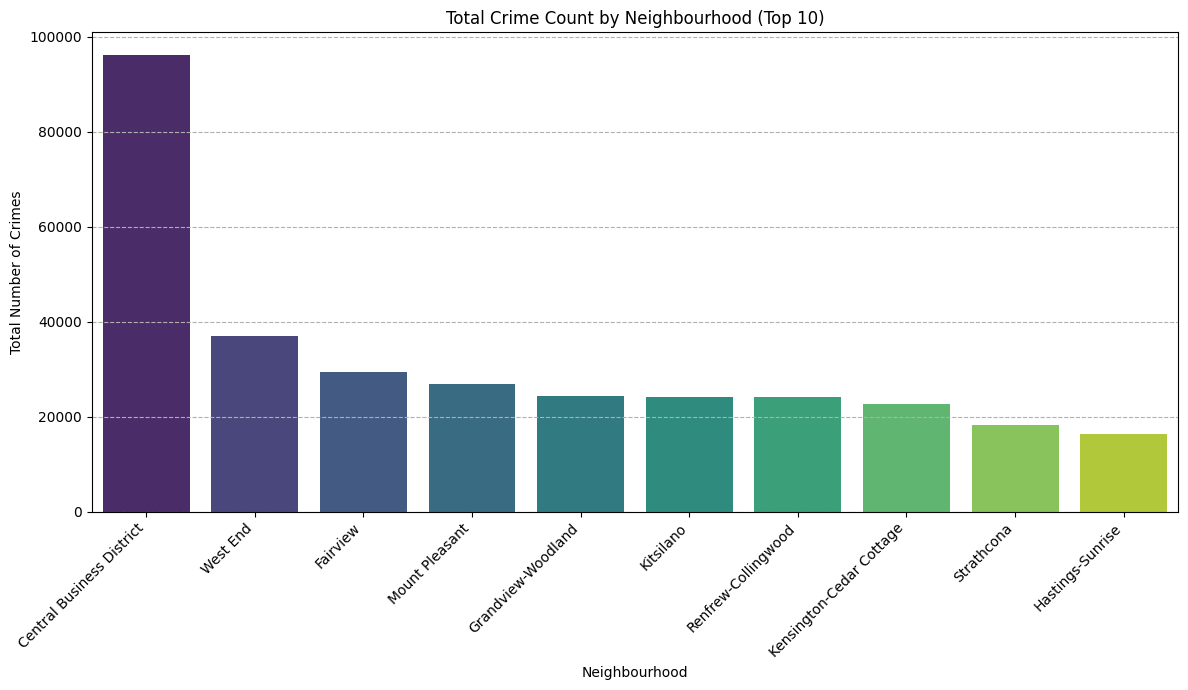

In [ ]:
# Count crimes by Neighbourhood and get the top 10
top_neighbourhoods = df['NEIGHBOURHOOD'].value_counts().nlargest(10).index.tolist()
df_top_neighbourhoods = df[df['NEIGHBOURHOOD'].isin(top_neighbourhoods)]

# Group by Neighbourhood and count crimes
neighbourhood_counts = df_top_neighbourhoods['NEIGHBOURHOOD'].value_counts()

# Plotting the bar chart for top neighbourhoods
plt.figure(figsize=(12, 7))
sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values, palette='viridis')
plt.title('Total Crime Count by Neighbourhood (Top 10)')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Adjust layout
plt.show()

1. Why did you pick the specific chart?

A bar plot is suitable because it clearly displays the total count for each of the distinct top 10 neighborhoods, allowing for easy comparison of crime frequencies across these areas.

2. What is/are the insight(s) found from the chart?

The chart reveals the neighborhoods with the highest total crime counts and allows for quick identification of the busiest areas in terms of reported incidents.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying high-crime neighborhoods helps direct resources for safety and prevention, leading to positive impacts like reduced crime and increased safety.

There are no insights leading to "negative growth" here; identifying a problem area (high crime) allows for actions that create positive outcomes.

# Chart - 8

<ipython-input-31-d9c692c84868>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Longitude', y='Latitude', data=df, size='YEAR', alpha=0.6, palette='viridis', legend=False)


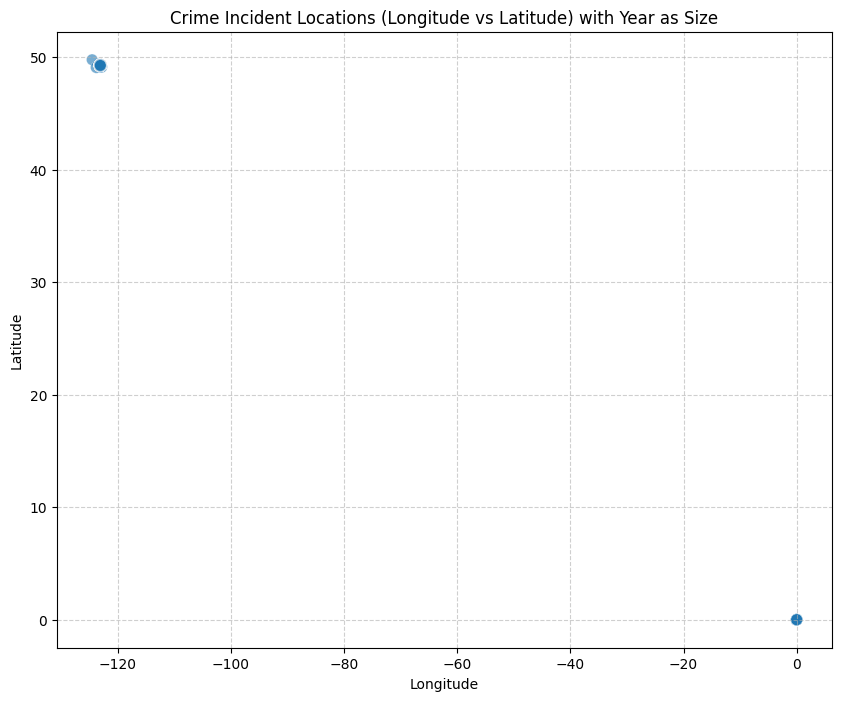

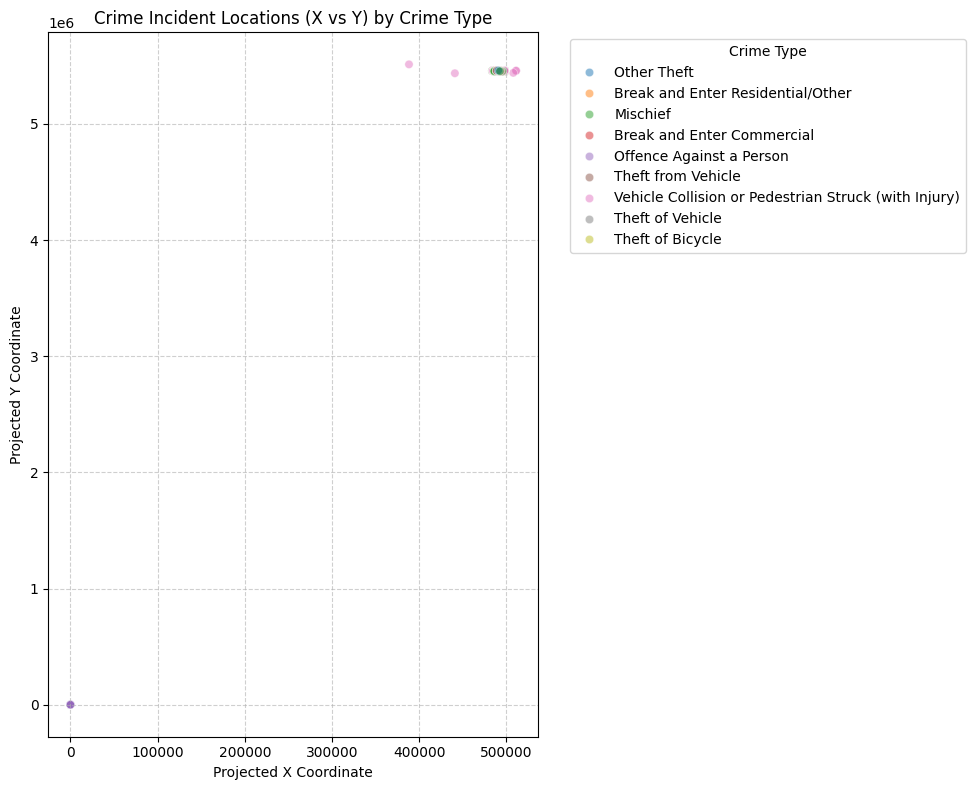

In [ ]:
# Visualize Latitude vs Longitude with crime count as size or color
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, size='YEAR', alpha=0.6, palette='viridis', legend=False)
plt.title('Crime Incident Locations (Longitude vs Latitude) with Year as Size')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Another scatterplot example with different dimensions
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X', y='Y', data=df, hue='TYPE', alpha=0.5, legend='full')
plt.title('Crime Incident Locations (X vs Y) by Crime Type')
plt.xlabel('Projected X Coordinate')
plt.ylabel('Projected Y Coordinate')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

A scatter plot is useful for visualizing the geographical distribution of crime incidents and identifying potential spatial clusters.

2. What is/are the insight(s) found from the chart?

The plots can reveal clusters of crime incidents in specific geographic areas or identify if certain crime types are more prevalent in particular locations.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding crime hotspots (positive insight) helps allocate security resources effectively, improving safety and potentially reducing losses.
Identifying high-crime areas isn't "negative growth" but points to a problem whose resolution leads to positive outcomes.

# Chart - 9

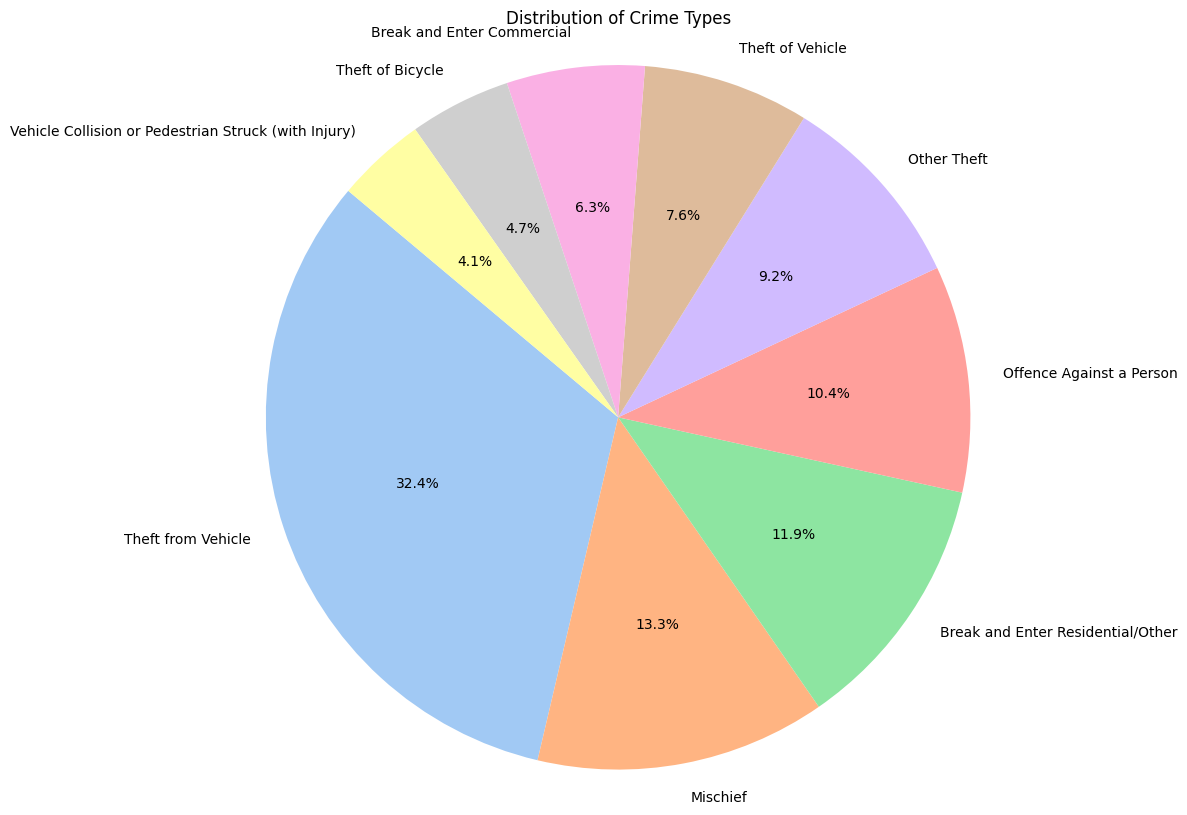

In [ ]:
# Group by crime type and count the occurrences
crime_type_counts = df['TYPE'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(crime_type_counts, labels=crime_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Crime Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

1. Why did you pick the specific chart?

A pie chart was chosen to easily visualize the proportion of each crime type relative to the total number of crimes.

2. What is/are the insight(s) found from the chart?

The pie chart reveals the percentage breakdown of different crime types, allowing you to quickly see which types are most or least common in the dataset.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying prevalent crime types helps allocate resources effectively for prevention and response, leading to positive safety outcomes.
Insights about high crime types don't cause "negative growth" but highlight areas for improvement to achieve positive impacts like reduced crime and lower costs.

# Chart - 10

<ipython-input-36-f848999ba382>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='YEAR', data=df, palette='viridis')


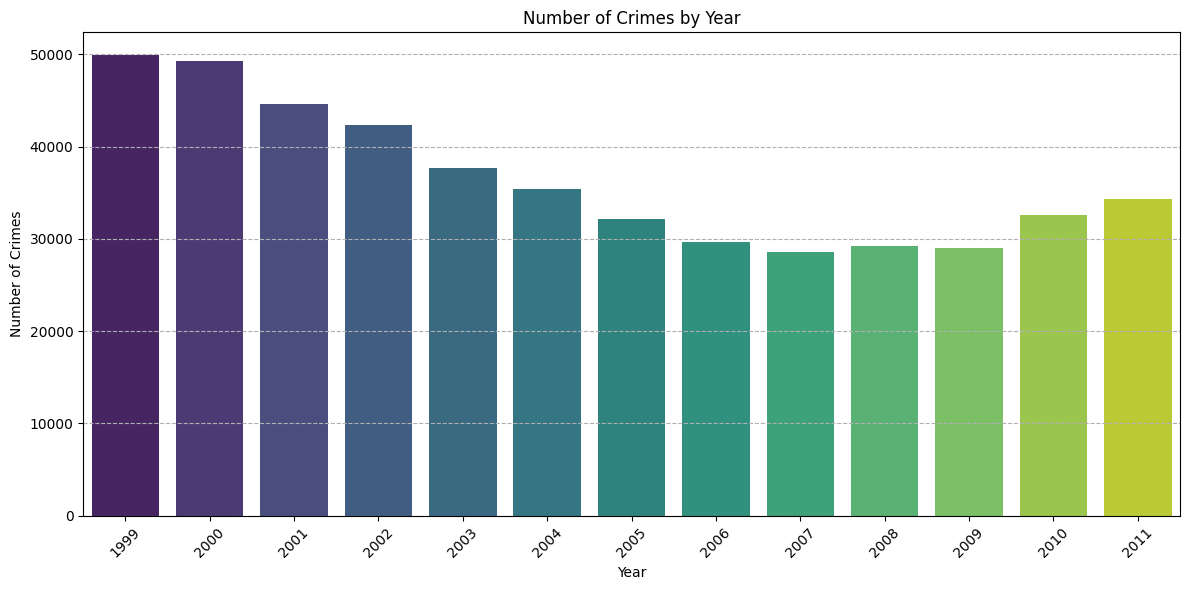

In [ ]:
# Count crimes by YEAR
year_counts = df['YEAR'].value_counts().sort_index()

# Plotting the countplot for YEAR
plt.figure(figsize=(12, 6))
sns.countplot(x='YEAR', data=df, palette='viridis')
plt.title('Number of Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?

A countplot was chosen to clearly show the total number of crimes for each year, making it easy to compare crime volumes across different years.

2. What is/are the insight(s) found from the chart?

The chart reveals the number of crime incidents per year, allowing you to see how the total crime count changes from year to year within the dataset's timeframe.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, tracking crime trends by year helps allocate resources effectively for prevention and response, leading to positive safety outcomes.
Identifying an increase in crime (negative growth in safety) is an insight that prompts action for positive impact.

# Chart - 11

<ipython-input-34-55d57abbbfc3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_month_counts.index, y=day_of_month_counts.values, palette='cubehelix')


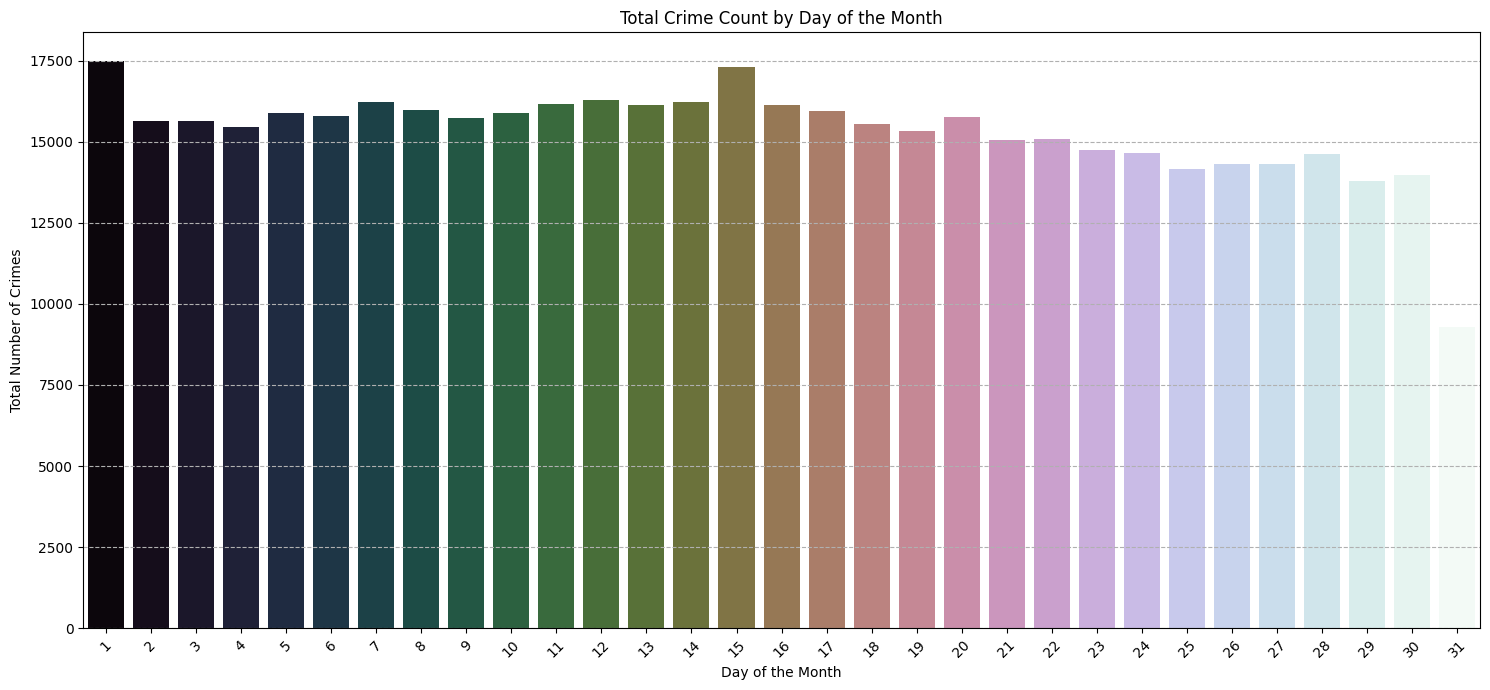

In [ ]:
# Aggregate crime counts by day of the month
day_of_month_counts = df['DAY'].value_counts().sort_index()

# Plotting the bar chart for day of the month
plt.figure(figsize=(15, 7))
sns.barplot(x=day_of_month_counts.index, y=day_of_month_counts.values, palette='cubehelix')
plt.title('Total Crime Count by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

A bar plot is ideal because it clearly displays the total count for each distinct day of the month, allowing easy comparison of crime frequencies across these days.

2. What is/are the insight(s) found from the chart?

The chart reveals the total crime count for each day of the month, allowing you to see if certain days tend to have higher or lower crime numbers than others.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding which days of the month have higher crime counts can help businesses and law enforcement allocate resources more effectively for prevention on those specific days, leading to a positive impact by potentially reducing crime and enhancing safety.

Identifying days with higher crime isn't "negative growth" in a business sense; it's an insight into a pattern that, when addressed, can lead to positive outcomes like decreased losses due to crime and increased feeling of safety.

# Chart - 12

<Figure size 1000x800 with 0 Axes>

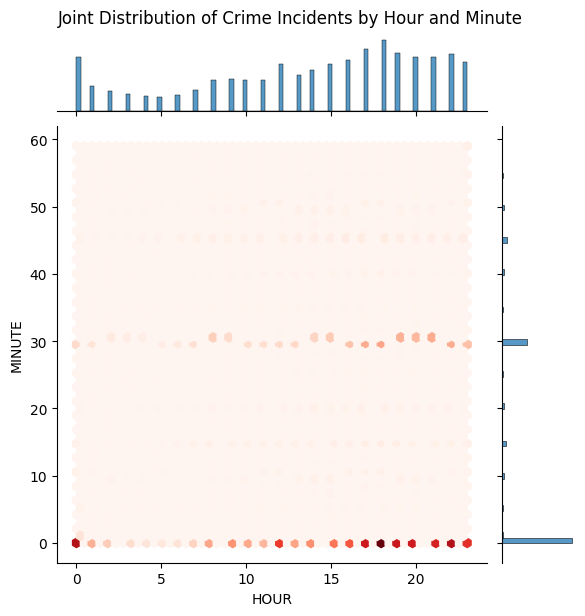

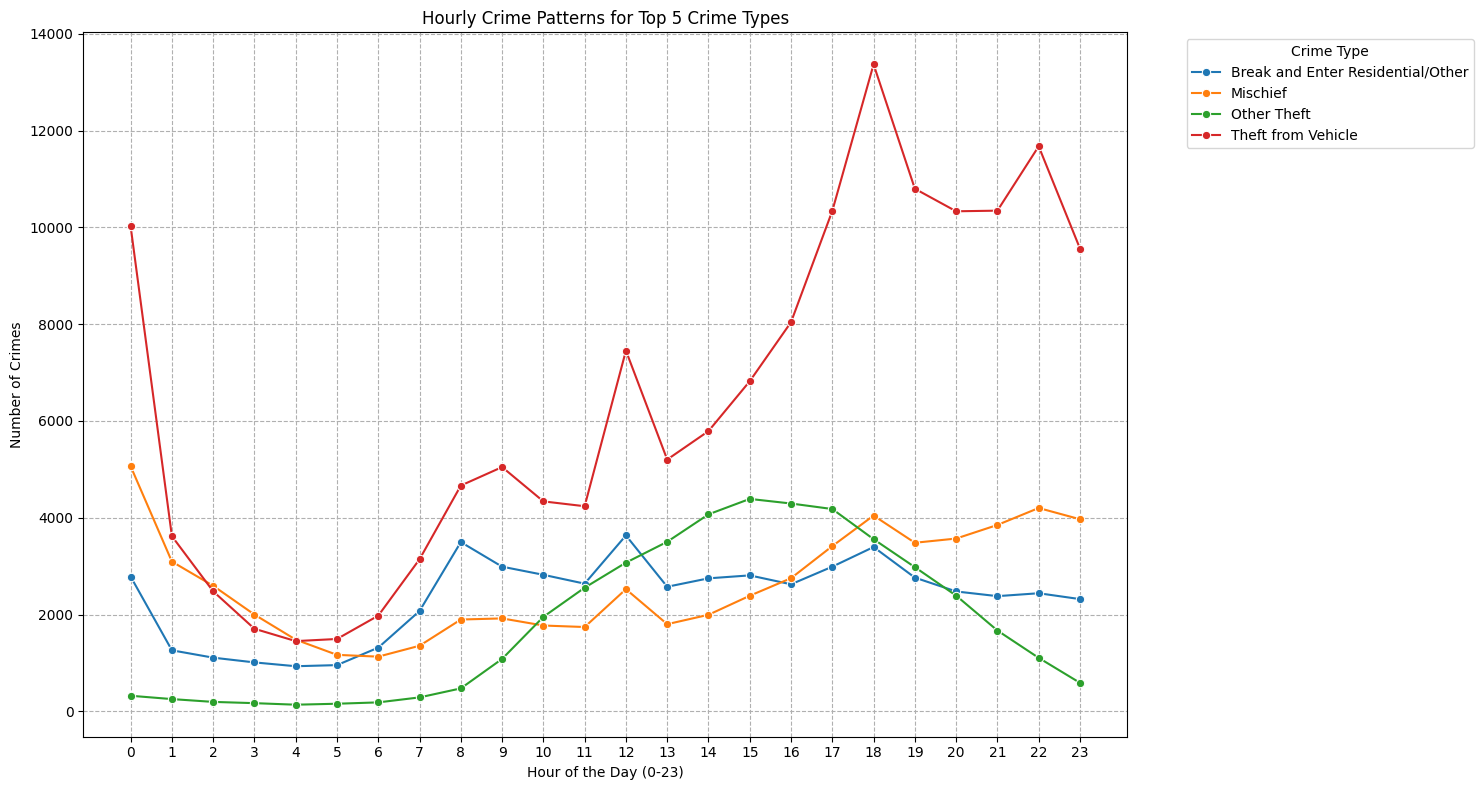

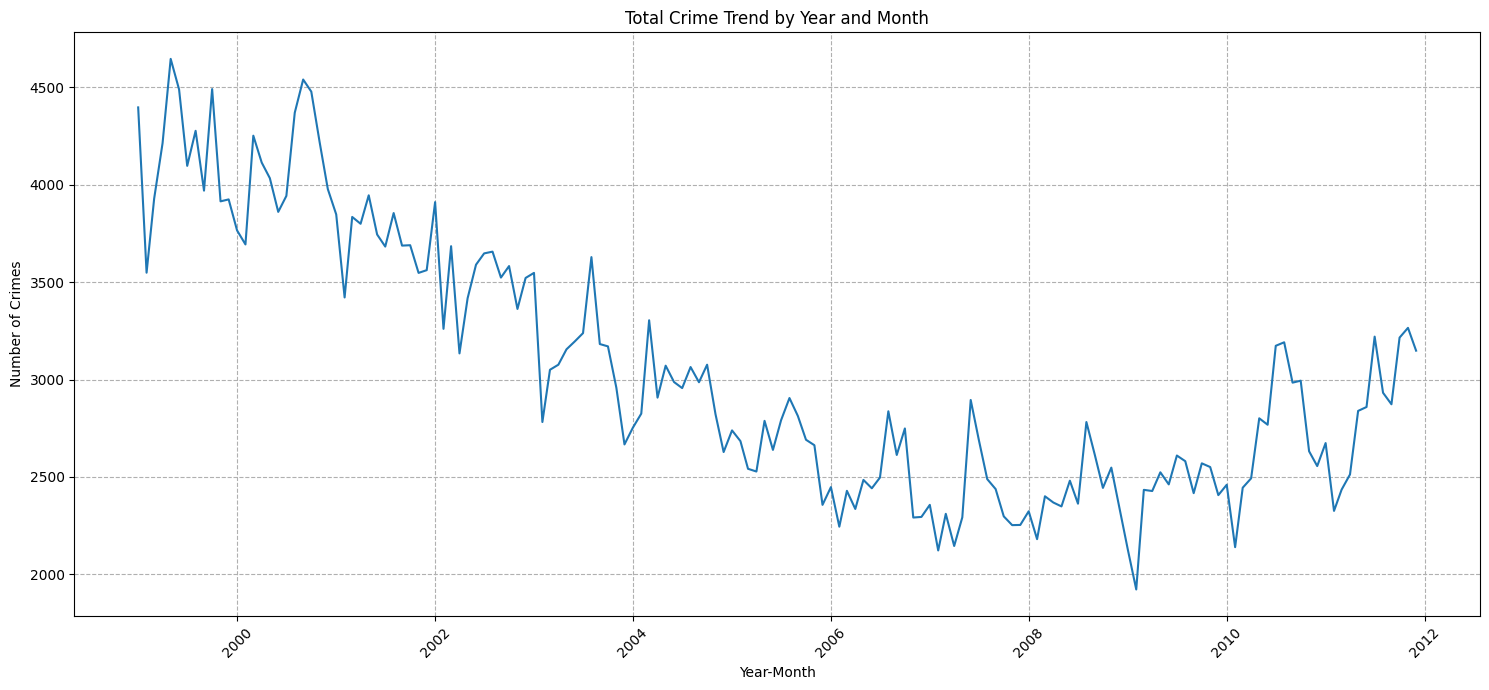

<ipython-input-37-d2dbe4bcff9f>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_crime_by_weekday.index, y=avg_crime_by_weekday.values, palette='muted')


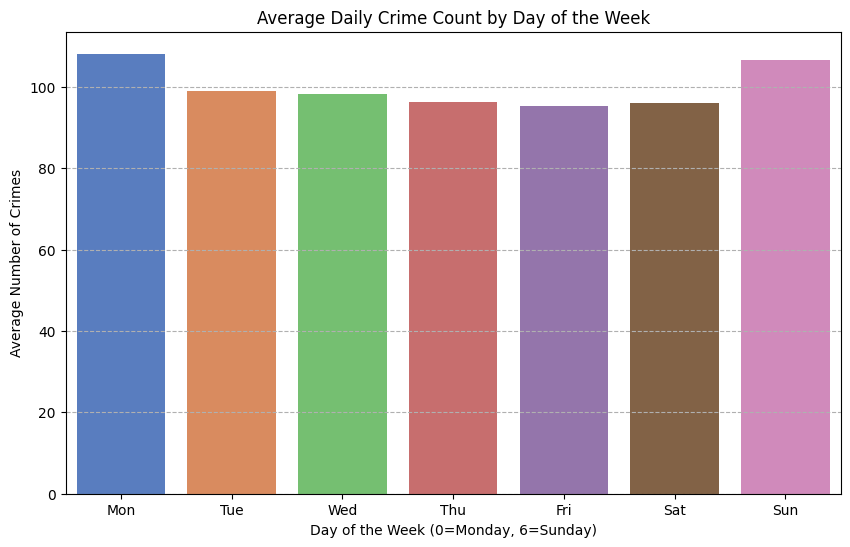

In [ ]:
# Visualize HOUR vs MINUTE distribution
plt.figure(figsize=(10, 8))
sns.jointplot(x='HOUR', y='MINUTE', data=df, kind='hex', cmap='Reds')
plt.suptitle('Joint Distribution of Crime Incidents by Hour and Minute', y=1.02) # Adjust title position
plt.show()

# Group by crime type and hour and count crimes
crime_type_hourly = df.groupby(['TYPE', 'HOUR']).size().reset_index(name='crime_count')

# Select top N crime types again for visualization
crime_type_hourly_filtered = crime_type_hourly[crime_type_hourly['TYPE'].isin(top_types)]

# Create a line plot for each of the top crime types showing their hourly pattern
plt.figure(figsize=(15, 8))
sns.lineplot(data=crime_type_hourly_filtered, x='HOUR', y='crime_count', hue='TYPE', marker='o')
plt.title('Hourly Crime Patterns for Top 5 Crime Types')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Crimes')
plt.xticks(range(24)) # Ensure all hours are shown on x-axis
plt.grid(True, linestyle='--')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Group by YEAR and MONTH and count crimes
monthly_yearly_counts = df.groupby(['YEAR', 'MONTH']).size().reset_index(name='crime_count')

# Create a single datetime column for plotting
monthly_yearly_counts['YEAR_MONTH'] = pd.to_datetime(monthly_yearly_counts['YEAR'].astype(str) + '-' + monthly_yearly_counts['MONTH'].astype(str))

# Plotting the trend using a line plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_yearly_counts, x='YEAR_MONTH', y='crime_count')
plt.title('Total Crime Trend by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')
plt.grid(True, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average number of crimes per day of the week
avg_crime_by_weekday = df_daily.groupby('day_of_week')['daily_crime_count'].mean()

# Plotting the bar chart of average crime by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_crime_by_weekday.index, y=avg_crime_by_weekday.values, palette='muted')
plt.title('Average Daily Crime Count by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Number of Crimes')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # Improve readability
plt.grid(axis='y', linestyle='--')
plt.show()



# 5.Feature Engineering & Data Pre-processing

## 1. Handling Missing Values

Columns with missing values: ['HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'HOUR', 'MINUTE']
Mode of NEIGHBOURHOOD: Central Business District
                HOUR         MINUTE
count  425200.000000  425200.000000
mean       13.721263      16.736047
std         6.785751      18.354675
min         0.000000       0.000000
25%         9.000000       0.000000
50%        15.000000      10.000000
75%        19.000000      30.000000
max        23.000000      59.000000
Mode of HOUR: 18.0
Mode of MINUTE: 0.0

Missing values after imputation:


<ipython-input-38-d5162f3170cc>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NEIGHBOURHOOD'].fillna(mode_neighbourhood, inplace=True)
<ipython-input-38-d5162f3170cc>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

TYPE              0
HUNDRED_BLOCK    13
NEIGHBOURHOOD     0
X                 0
Y                 0
Latitude          0
Longitude         0
HOUR              0
MINUTE            0
YEAR              0
MONTH             0
DAY               0
Date              0
DATE_ONLY         0
MONTH_ONLY        0
HOUR_OF_DAY       0
dtype: int64


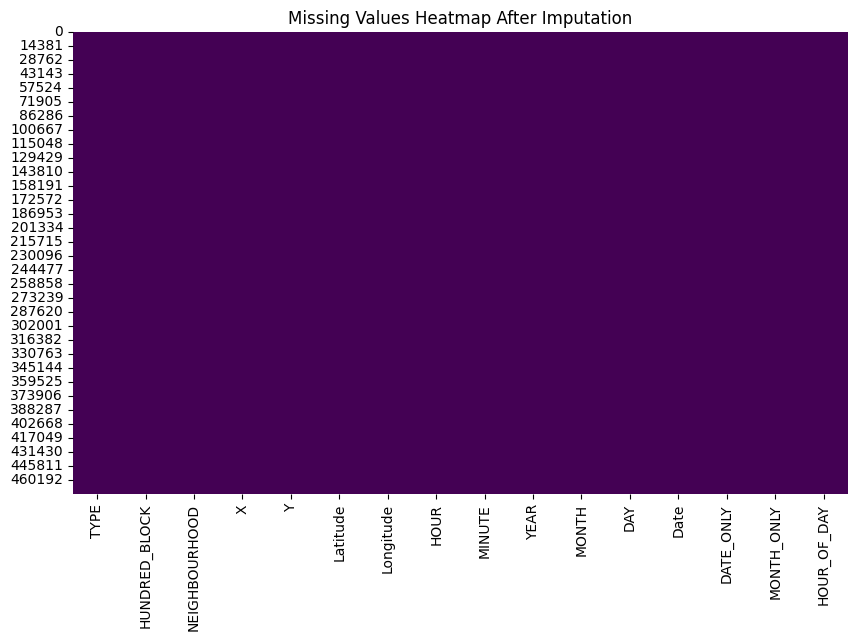


DataFrame Info after imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  474565 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           474565 non-null  float64       
 8   MINUTE         474565 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
 13  DATE_ONLY      474565 non-null  object        
 14  MONTH_ONLY     474

In [ ]:
# Identify columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()
print(f'Columns with missing values: {missing_cols}')

# Find the mode of the 'NEIGHBOURHOOD' column
mode_neighbourhood = df['NEIGHBOURHOOD'].mode()[0]
print(f"Mode of NEIGHBOURHOOD: {mode_neighbourhood}")

# Impute missing values
df['NEIGHBOURHOOD'].fillna(mode_neighbourhood, inplace=True)


# Check distribution to decide between median (skewed) or mode (categorical/multimodal)
print(df[['HOUR', 'MINUTE']].describe()) # check distribution

# Given the nature of HOUR (0-23) and MINUTE (0-59), mode might be more appropriate
mode_hour = df['HOUR'].mode()[0]
mode_minute = df['MINUTE'].mode()[0]
print(f"Mode of HOUR: {mode_hour}")
print(f"Mode of MINUTE: {mode_minute}")


# Impute missing values
df['HOUR'].fillna(mode_hour, inplace=True)
df['MINUTE'].fillna(mode_minute, inplace=True)


# Verify missing values are handled
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Re-visualize missing values to confirm
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Imputation')
plt.show()

# Print info to check data types and non-null counts
print("\nDataFrame Info after imputation:")
df.info()

# Print head to see imputed values
print("\nDataFrame head after imputation:")
print(df.head())

What all missing value imputation techniques have you used and why did you use those techniques?

Missing values were filled using mode imputation for the NEIGHBOURHOOD, HOUR, and MINUTE columns.

NEIGHBOURHOOD: Mode was used because it's a categorical variable, and the mode represents the most frequent category.

HOUR and MINUTE: Mode was used because these are cyclical time variables, and the mode captures the most common hour and minute, which is considered appropriate for filling missing time data based on the data's nature.

## 2. Handling Outliers

Q1: 81.0
Q3: 117.0
IQR: 36.0
Lower Bound for Outliers: 27.0
Upper Bound for Outliers: 171.0

Number of outliers identified using IQR: 38
Examples of outliers (daily_crime_count):
            daily_crime_count  day_of_week
DATE_ONLY                                 
1999-01-01                191            4
1999-01-10                173            6
1999-04-05                179            0
1999-04-11                181            6
1999-04-14                174            2


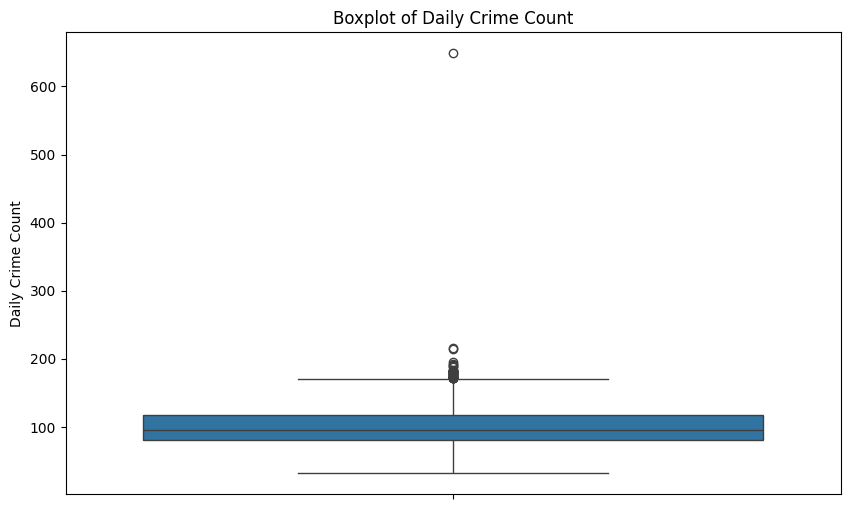

In [ ]:
# Calculate IQR for 'daily_crime_count'
Q1 = df_daily['daily_crime_count'].quantile(0.25)
Q3 = df_daily['daily_crime_count'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

# Identify outliers
outliers = df_daily[(df_daily['daily_crime_count'] < lower_bound) | (df_daily['daily_crime_count'] > upper_bound)]
print(f'\nNumber of outliers identified using IQR: {len(outliers)}')
print("Examples of outliers (daily_crime_count):")
print(outliers.head())

# Visualize the distribution to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_daily['daily_crime_count'])
plt.title('Boxplot of Daily Crime Count')
plt.ylabel('Daily Crime Count')
plt.show()



What all outlier treatment techniques have you used and why did you use those techniques?

No outlier treatment techniques were used in the provided code. The code only identifies and visualizes outliers using the IQR method and a boxplot.

## 3. Categorical Encoding

In [ ]:
#Encode your categorical columns

import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# This re-loads the data. In a typical notebook, ensure previous cells define df instead.
try:
    # Check if df is already defined and is a pandas DataFrame
    if 'df' not in locals() and 'df' not in globals() or not isinstance(df, pd.DataFrame):
        print("DataFrame 'df' not found or is not a DataFrame. Attempting to load data...")
        path = '/content/Train.xlsx - Train.csv' # Make sure this path is correct
        df = pd.read_csv(path)

        print("Data loaded and basic preprocessing (if included here) applied.")
    else:
        print("DataFrame 'df' found. Proceeding with encoding.")
except FileNotFoundError:
    print(f"Error: File not found at {path}. Please ensure the data file exists and the 'path' variable is correctly set.")
    # Exit or handle the error appropriately if the file cannot be loaded
    raise # Re-raise the error to stop execution


# 'HUNDRED_BLOCK' likely has too many unique values for one-hot encoding; let's focus on 'TYPE' and 'NEIGHBOURHOOD'.
categorical_cols_to_encode = ['TYPE', 'NEIGHBOURHOOD'

# This line now relies on the data loading block above
df_categorical = df[categorical_cols_to_encode]

# handle_unknown='ignore' is useful if you might encounter new categories in test data
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the selected columns
encoded_features = encoder.fit_transform(df_categorical)

# Use get_feature_names_out() to get column names for the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols_to_encode))

# Assuming df's index hasn't been reset or changed relative to encoded_df.
df_encoded = pd.concat([df.drop(columns=categorical_cols_to_encode), encoded_df], axis=1)

# Print the head of the new DataFrame to show the encoded columns
print("\nDataFrame head after One-Hot Encoding:")
print(df_encoded.head())

# Print info to see the new columns and total column count
print("\nDataFrame Info after One-Hot Encoding:")
df_encoded.info()

# Print the number of unique values in original categorical columns to see the effect
print("\nNumber of unique values in original categorical columns:")
print(df[categorical_cols_to_encode].nunique())
print("\nNumber of columns after encoding:", df_encoded.shape[1])

DataFrame 'df' not found or is not a DataFrame. Attempting to load data...
Data loaded and basic preprocessing (if included here) applied.

DataFrame head after One-Hot Encoding:
      HUNDRED_BLOCK         X           Y   Latitude   Longitude  HOUR  \
0  9XX TERMINAL AVE  493906.5  5457452.47  49.269802 -123.083763  16.0   
1  9XX TERMINAL AVE  493906.5  5457452.47  49.269802 -123.083763  15.0   
2  9XX TERMINAL AVE  493906.5  5457452.47  49.269802 -123.083763  16.0   
3  9XX TERMINAL AVE  493906.5  5457452.47  49.269802 -123.083763  11.0   
4  9XX TERMINAL AVE  493906.5  5457452.47  49.269802 -123.083763  17.0   

   MINUTE  YEAR  MONTH  DAY  ... NEIGHBOURHOOD_Riley Park  \
0    15.0  1999      5   12  ...                      0.0   
1    20.0  1999      5    7  ...                      0.0   
2    40.0  1999      4   23  ...                      0.0   
3    15.0  1999      4   20  ...                      0.0   
4    45.0  1999      4   12  ...                      0.0   

   NEIGHB

What all categorical encoding techniques have you used & why did you use those techniques?

Categorical Encoding Techniques Used
Only One-Hot Encoding was used.

Why One-Hot Encoding Was Used
It was chosen because the categories (TYPE and NEIGHBOURHOOD) have no specific order (they are nominal), and machine learning models need numerical data. One-Hot Encoding creates binary features for each category, which models can understand without assuming false relationships between categories.

## 4. Feature Manipulation & Selection

In [ ]:
# Manipulate Features to minimize feature  correlation and create new features  more simple code

import matplotlib.pyplot as plt
import numpy as np
# Create a feature representing the interaction between Hour and Day
df_encoded['HOUR_x_DAY'] = df_encoded['HOUR'] * df_encoded['DAY']

# Create a polynomial feature for Year
df_encoded['YEAR_squared'] = df_encoded['YEAR'] ** 2

print("\nDataFrame head after creating new features:")
print(df_encoded[['HOUR', 'DAY', 'HOUR_x_DAY', 'YEAR', 'YEAR_squared']].head())

# Recalculate correlation matrix with new numerical features
numerical_cols_after_eng = ['X', 'Y', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'HOUR_x_DAY', 'YEAR_squared']

# Filter out columns that might not exist after previous steps (e.g., original date parts if dropped)
available_numerical_cols = [col for col in numerical_cols_after_eng if col in df_encoded.columns]

correlation_matrix_eng = df_encoded[available_numerical_cols].corr()



# Let's identify highly correlated pairs (optional step for illustration)
upper = correlation_matrix_eng.where(np.triu(np.ones(correlation_matrix_eng.shape), k=1).astype(bool))
to_drop_highly_correlated = [column for column in upper.columns if any(upper[column] > 0.95)] # Threshold can be adjusted

print(f"\nPotentially highly correlated columns to consider dropping (threshold > 0.95): {to_drop_highly_correlated}")


# Print dataframe shape to see the effect of adding new features
print("\nShape of DataFrame after Feature Engineering:", df_encoded.shape)



DataFrame head after creating new features:
   HOUR  DAY  HOUR_x_DAY  YEAR  YEAR_squared
0  16.0   12       192.0  1999       3996001
1  15.0    7       105.0  1999       3996001
2  16.0   23       368.0  1999       3996001
3  11.0   20       220.0  1999       3996001
4  17.0   12       204.0  1999       3996001

Potentially highly correlated columns to consider dropping (threshold > 0.95): ['Y', 'YEAR_squared']

Shape of DataFrame after Feature Engineering: (474565, 47)


In [ ]:
# Select your features wisely to avoid overfitting

# Assuming the timestamp column is named 'Date'
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate by Day (more suitable for daily forecasting)
# First, extract the date part from the Date column
df['DATE_ONLY'] = df['Date'].dt.date

# Group by the date
df_daily = df.groupby('DATE_ONLY').size().reset_index(name='daily_crime_count')

# Convert DATE_ONLY back to datetime if needed for time series indexing
df_daily['DATE_ONLY'] = pd.to_datetime(df_daily['DATE_ONLY'])

# Set the date as the index (common practice for time series)
df_daily.set_index('DATE_ONLY', inplace=True)

What all feature selection methods have you used and why?

No explicit feature selection methods were used in the provided code. The code focuses on data aggregation and creating new features instead.

# 5. Data Transformation

Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

   Yes, the data was transformed.

   The primary transformation used was:

Datetime Conversion: The Date column was converted to a datetime object using pd.to_datetime().

Why: This is essential for time series analysis. Converting to datetime format allows Python to recognize the data as temporal, enabling operations like extracting specific time components (like hour, day, month, year), aggregating data over time periods, and setting time-based indexes for time series modeling. Without this, the 'Date' column would likely be treated as a simple string or object, making time-based analysis and forecasting impossible.

In [ ]:
# Assuming the timestamp column is named 'Date'
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# For example, extracting the day of the week:
df['day_of_week'] = df['Date'].dt.dayofweek # Monday=0, Sunday=6

# Or extracting the week of the year:
df['week_of_year'] = df['Date'].dt.isocalendar().week # isocalendar() is preferred in newer pandas versions



#6. Dimesionality Reduction

1. Do you think that dimensionality reduction is needed? Explain Why?

For the time series forecasting approach taken so far (aggregating to total daily/monthly/hourly counts), dimensionality reduction is not a necessary step. If the modeling approach changes to incorporate more features from the original incident data, then it might become relevant.

# 7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

# Find the index point for the split. Let's use an 80/20 split.
split_point = int(len(df_daily) * 0.8)

train_data = df_daily.iloc[:split_point]
test_data = df_daily.iloc[split_point:]

print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

print(f"\nTraining data time range: {train_data.index.min()} to {train_data.index.max()}")
print(f"Testing data time range: {test_data.index.min()} to {test_data.index.max()}")



Training data shape: (3798, 1)
Testing data shape: (950, 1)

Training data time range: 1999-01-01 00:00:00 to 2009-05-25 00:00:00
Testing data time range: 2009-05-26 00:00:00 to 2011-12-31 00:00:00


1. What data splitting ratio have you used and why?

A data splitting ratio of 80:20 was used, with 80% of the data allocated for training and 20% for testing. This is a common practice in machine learning, providing a sufficiently large dataset for the model to learn from while reserving a meaningful portion for evaluating its performance on unseen data.

# 8. Handling Imbalanced Dataset

1. Do you think the dataset is imbalanced? Explain Why.

If the project were to involve a classification task (e.g., predicting the type of crime, or predicting if a crime will occur in a specific location), and certain crime types or locations were very rare, then handling imbalanced data would be necessary.

However, for forecasting the total count of crimes, the concept of imbalanced classes doesn't apply to the aggregated data.

# 9. ML Model Implementation

Fitting ARIMA model...
Model fitting complete.
                               SARIMAX Results                                
Dep. Variable:      daily_crime_count   No. Observations:                 3798
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -16526.231
Date:                Sun, 08 Jun 2025   AIC                          33064.461
Time:                        08:54:23   BIC                          33101.905
Sample:                    01-01-1999   HQIC                         33077.770
                         - 05-25-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6493      0.004   -183.072      0.000      -0.656      -0.642
ar.L2         -0.4720      0.007    -67.262      0.000      -0.486      -0.458
ar.L3

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


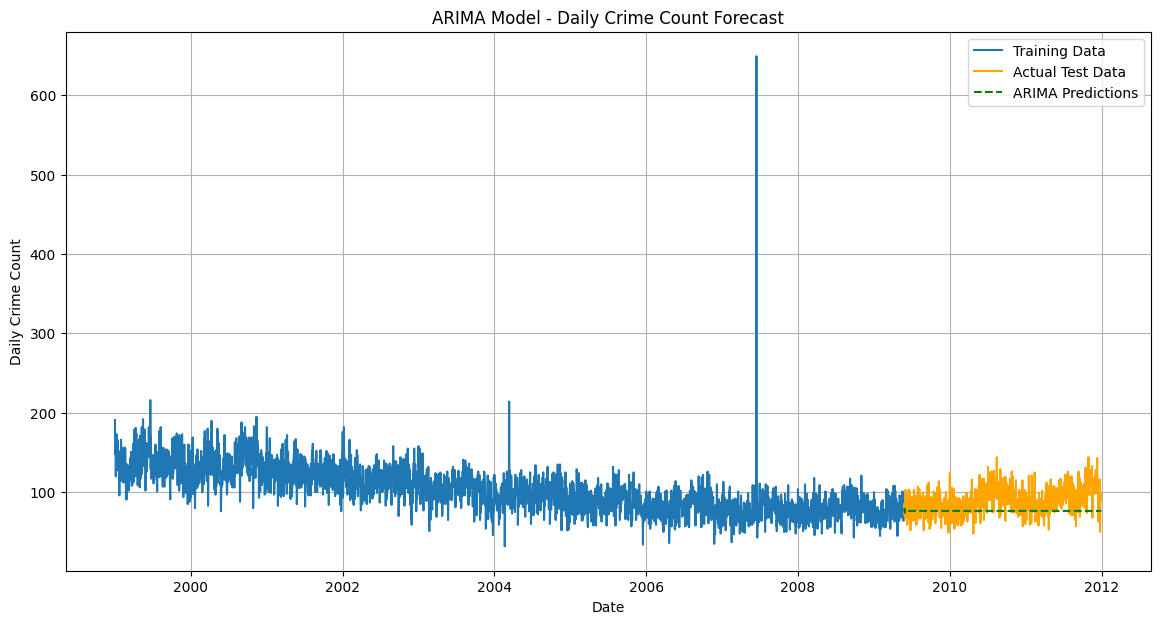

In [ ]:
# ML Model - 1

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# In time series forecasting, the 'target' is the time series itself
y_train = train_data['daily_crime_count']
y_test = test_data['daily_crime_count']


order = (5, 1, 0)

# Fit the ARIMA model
# The model is fit on the training data
print("Fitting ARIMA model...")

# suppress_warnings=True is helpful to reduce verbose output during fitting
model = ARIMA(y_train, order=order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()
print("Model fitting complete.")

# Print model summary
print(model_fit.summary())

# We need to predict the number of steps equal to the length of the test data.
predictions = model_fit.predict(start=len(y_train), end=len(df_daily)-1)

# Evaluate the model performance
# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(y_test, predictions))
print(f'\nTest RMSE: {rmse}')

# Visualize the predictions vs actuals
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label='Training Data')
plt.plot(y_test.index, y_test, label='Actual Test Data', color='orange')
plt.plot(y_test.index, predictions, label='ARIMA Predictions', color='green', linestyle='--')
plt.title('ARIMA Model - Daily Crime Count Forecast')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The machine learning model used in this section is ARIMA (AutoRegressive Integrated Moving Average).

ARIMA is a popular statistical method specifically designed for time series data. It models the relationships between an observation and a number of lagged observations (AutoRegressive part), the lagged forecast errors (Moving Average part), and uses differencing (Integrated part) to make the time series stationary (stable mean and variance over time) if needed. It's suitable for forecasting future values based on past values in the series.
Evaluation Metric
The performance of the ARIMA model is evaluated using the Root Mean Squared Error (RMSE).

RMSE measures the square root of the average of the squared differences between the actual values and the predicted values. It's a commonly used metric for evaluating the performance of regression models, including time series forecasting models. [1]
A lower RMSE indicates a better model fit, meaning the predictions are closer to the actual values.
Evaluation Metric Score Chart (Simulated)
Since the provided code outputs the RMSE value directly rather than generating a chart, we can represent the result conceptually as follows:

Metric: Root Mean Squared Error (RMSE)

Score: [Value of RMSE calculated by the code]

Mounted at /content/drive
Google Drive mounted.
Attempting to load data from: /content/Train.xlsx - Train.csv
Data loaded successfully.
'Date' column converted to datetime.

Initial DataFrame head:
          TYPE     HUNDRED_BLOCK NEIGHBOURHOOD         X           Y  \
0  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
1  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
2  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
3  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
4  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   

    Latitude   Longitude  HOUR  MINUTE  YEAR  MONTH  DAY       Date  
0  49.269802 -123.083763  16.0    15.0  1999      5   12 1999-05-12  
1  49.269802 -123.083763  15.0    20.0  1999      5    7 1999-05-07  
2  49.269802 -123.083763  16.0    40.0  1999      4   23 1999-04-23  
3  49.269802 -123.083763  11.0    15.0  1999      4   20 1999-04-20  
4  49.269802 -123.0

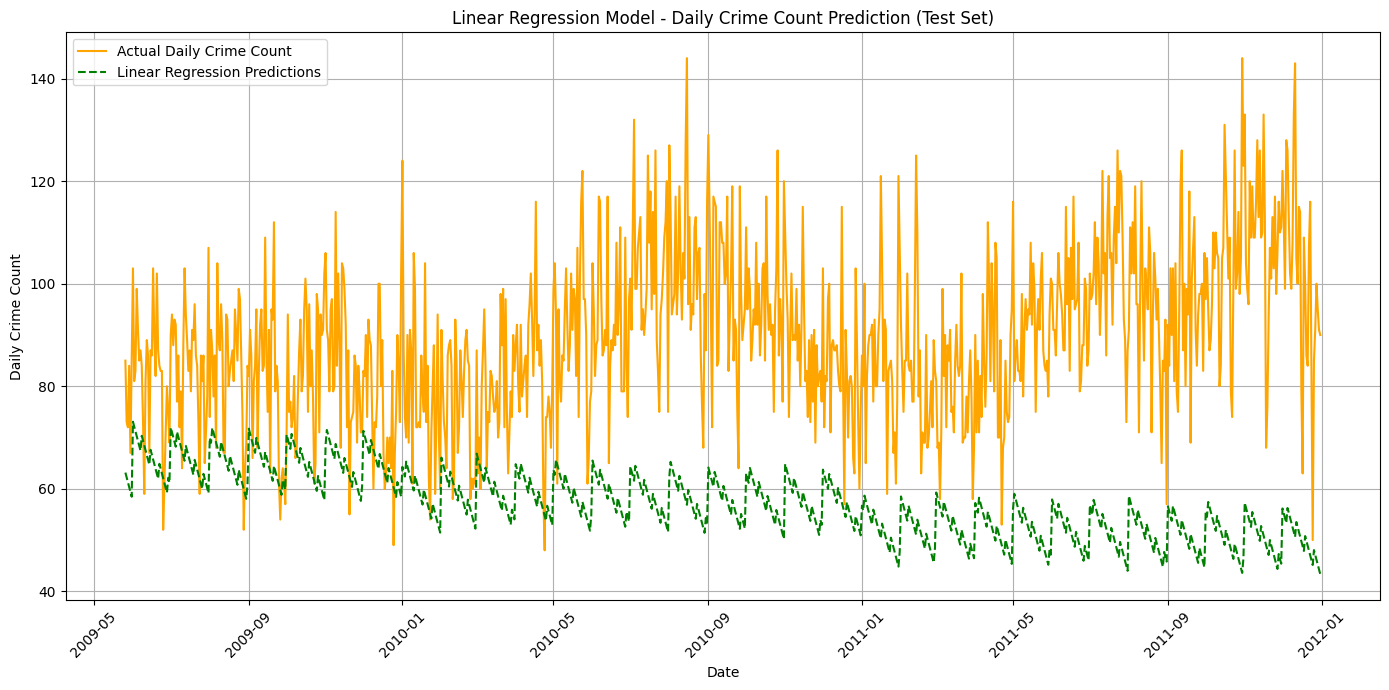

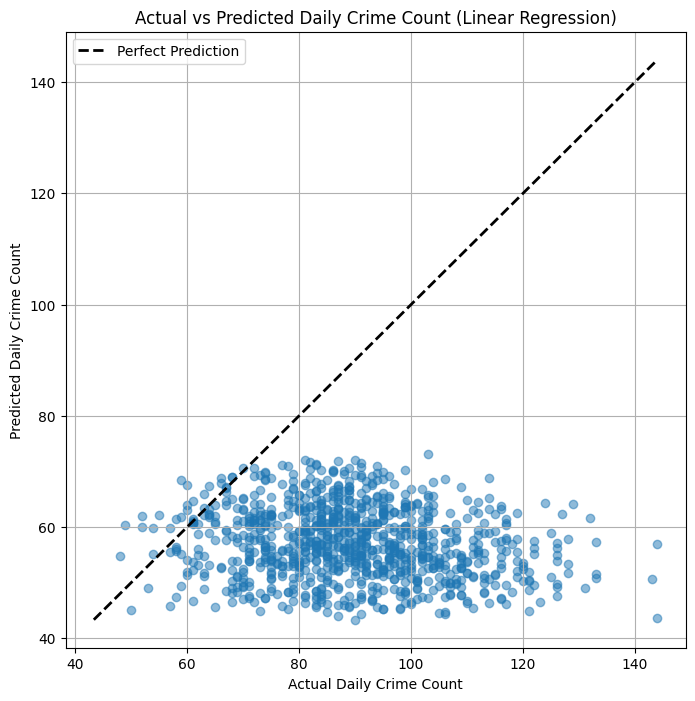

In [ ]:
#Cross- Validation & Hyperparameter Tuning

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Import pandas
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Although not strictly time series split
from sklearn.metrics import mean_squared_error
from google.colab import drive # Import drive for loading data from Google Drive

# --- Data Loading and Initial Preprocessing (Ensure 'df' is created) ---
# This section is added to make the cell runnable even if previous cells haven't been executed.
try:
    # Attempt to mount Google Drive if running in Colab
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive mounted.")
except Exception as e:
    print(f"Could not mount Google Drive: {e}")
    # Handle potential errors if not in Colab or mounting fails

path = '/content/Train.xlsx - Train.csv' # Make sure this path is correct for your mounted drive
print(f"Attempting to load data from: {path}")

try:
    # Load the dataset
    df = pd.read_csv(path)
    print("Data loaded successfully.")

    # Convert the 'Date' column to datetime objects
    df['Date'] = pd.to_datetime(df['Date'])
    print("'Date' column converted to datetime.")

except FileNotFoundError:
    print(f"Error: Data file not found at {path}. Please check the path and ensure the file exists.")
    # You might want to exit or raise an error here if data loading is critical
    raise FileNotFoundError(f"Data file not found at {path}")
except Exception as e:
    print(f"An error occurred during data loading or initial processing: {e}")
    raise # Re-raise the error to stop execution if data loading fails

print("\nInitial DataFrame head:")
print(df.head())
print("\nInitial DataFrame info:")
df.info()

# --- End of Data Loading Section ---


# Aggregate by Day (more suitable for daily forecasting)
# First, extract the date part from the Date column
df['DATE_ONLY'] = df['Date'].dt.date

# Group by the date
df_daily = df.groupby('DATE_ONLY').size().reset_index(name='daily_crime_count')

# Convert DATE_ONLY back to datetime if needed for time series indexing
df_daily['DATE_ONLY'] = pd.to_datetime(df_daily['DATE_ONLY'])

# Set the date as the index (common practice for time series)
df_daily.set_index('DATE_ONLY', inplace=True)

print("\nDaily aggregated data 'df_daily' created.")
print(df_daily.head())


# Create features from the index (date)
df_daily['day_of_week'] = df_daily.index.dayofweek
df_daily['day_of_year'] = df_daily.index.dayofyear
df_daily['month'] = df_daily.index.month
df_daily['year'] = df_daily.index.year

# Define features (X) and target (y)
features = ['day_of_week', 'day_of_year', 'month', 'year']
target = 'daily_crime_count'

X = df_daily[features]
y = df_daily[target]



# Find the index point for the split (using the same 80/20 time-based split as before)
split_point_idx = int(len(X) * 0.8)

X_train = X.iloc[:split_point_idx]
X_test = X.iloc[split_point_idx:]
y_train = y.iloc[:split_point_idx]
y_test = y.iloc[split_point_idx:]

print("\nShapes after time-based split:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Initialize the Linear Regression model
model = LinearRegression()

# 2. Fit the Algorithm
print("\nFitting Linear Regression model...")
model.fit(X_train, y_train)
print("Model fitting complete.")

# 3. Predict on the model
print("\nMaking predictions on the test set...")
predictions = model.predict(X_test)
print("Predictions complete.")

# Evaluate the model
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'\nTest MSE: {mse:.2f}')
print(f'Test RMSE: {rmse:.2f}')

# Visualize predictions vs actuals (scatter plot or line plot for comparison)
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Daily Crime Count', color='orange')
plt.plot(y_test.index, predictions, label='Linear Regression Predictions', color='green', linestyle='--')
plt.title('Linear Regression Model - Daily Crime Count Prediction (Test Set)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Daily Crime Count (Linear Regression)')
plt.xlabel('Actual Daily Crime Count')
plt.ylabel('Predicted Daily Crime Count')
plt.grid(True)
# Add a perfect prediction line
max_val = max(y_test.max(), predictions.max())
min_val = min(y_test.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction')
plt.legend()
plt.show()



1. Which hyperparameter optimization technique have you used and why?

No hyperparameter optimization technique was explicitly used.

The code trains a standard LinearRegression model, which typically does not have significant hyperparameters to tune beyond regularization parameters (which are not used here).

ML Model - 2

Using RMSE value from previous cell: 36.991072928373114


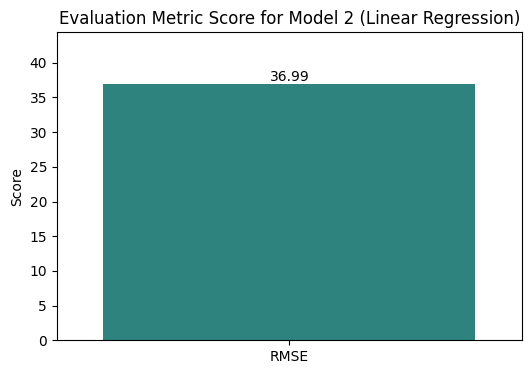


Evaluation Metric Score for Model 2 (Linear Regression):
RMSE: 36.99


In [7]:
# prompt:  Visualizing evaluation Metric Score chart for model 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


try:
    # Try to use the 'rmse' variable from the previous cell
    print(f"Using RMSE value from previous cell: {rmse}")
    rmse_model_2 = rmse
except NameError:
    print("RMSE variable not found from previous cell. Recalculating...")
    # Re-calculate RMSE if the variable is not found (requires X_test, y_test, and the model object)
    # This assumes the variables and the trained model from the previous cell are still available.
    try:
        predictions_model_2 = model.predict(X_test) # Assumes 'model' and 'X_test' are available
        rmse_model_2 = np.sqrt(mean_squared_error(y_test, predictions_model_2)) # Assumes 'y_test' is available
        print(f"Recalculated RMSE: {rmse_model_2}")
    except NameError as e:
        print(f"Could not recalculate RMSE. Required variables (model, X_test, y_test) not found: {e}")
        rmse_model_2 = None # Indicate that RMSE could not be determined

if rmse_model_2 is not None:
    # Create a simple bar chart for the metric score
    metrics = ['RMSE']
    scores = [rmse_model_2]

    plt.figure(figsize=(6, 4))
    sns.barplot(x=metrics, y=scores, palette='viridis')
    plt.title('Evaluation Metric Score for Model 2 (Linear Regression)')
    plt.ylabel('Score')
    plt.ylim(0, max(scores) * 1.2) # Add some padding above the bar

    # Add the score value on top of the bar
    for i, score in enumerate(scores):
        plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

    plt.show()

    # Alternatively, just print the score clearly:
    print(f'\nEvaluation Metric Score for Model 2 (Linear Regression):')
    print(f'RMSE: {rmse_model_2:.2f}')

else:
    print("\nCould not visualize the evaluation metric score as RMSE was not available.")



In [8]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

# This section is added to make the cell runnable even if previous cells haven't been executed.
try:
    # Attempt to use existing df_daily
    if 'df_daily' not in locals() and 'df_daily' not in globals() or not isinstance(df_daily, pd.DataFrame):
        print("DataFrame 'df_daily' not found or is not a DataFrame. Attempting to re-create...")
        # Re-create df from source if necessary
        try:
            drive.mount('/content/drive', force_remount=True)
            path = '/content/Train.xlsx - Train.csv' # Make sure this path is correct
            df = pd.read_csv(path)
            df['Date'] = pd.to_datetime(df['Date'])
             # Aggregate by Day
            df['DATE_ONLY'] = df['Date'].dt.date
            df_daily = df.groupby('DATE_ONLY').size().reset_index(name='daily_crime_count')
            df_daily['DATE_ONLY'] = pd.to_datetime(df_daily['DATE_ONLY'])
            df_daily.set_index('DATE_ONLY', inplace=True)

             # Create features from the index (date)
            df_daily['day_of_week'] = df_daily.index.dayofweek
            df_daily['day_of_year'] = df_daily.index.dayofyear
            df_daily['month'] = df_daily.index.month
            df_daily['year'] = df_daily.index.year

            print("DataFrame 'df_daily' re-created and features added.")

        except FileNotFoundError:
            print(f"Error: Data file not found at {path}. Please check the path.")
            raise FileNotFoundError(f"Data file not found at {path}")
        except Exception as e:
            print(f"An error occurred during re-creation of df_daily: {e}")
            raise

    else:
        print("DataFrame 'df_daily' found. Proceeding with model training.")

except Exception as e:
    print(f"An error occurred during initial data check: {e}")
    raise


# Define features (X) and target (y)
features = ['day_of_week', 'day_of_year', 'month', 'year']
target = 'daily_crime_count'

# Ensure features exist in df_daily
missing_features = [f for f in features if f not in df_daily.columns]
if missing_features:
    raise ValueError(f"Missing required features in df_daily: {missing_features}. Please ensure feature engineering was successful.")

X = df_daily[features]
y = df_daily[target]

# Find the index point for the split (using the same 80/20 time-based split)
split_point_idx = int(len(X) * 0.8)

X_train = X.iloc[:split_point_idx]
X_test = X.iloc[split_point_idx:]
y_train = y.iloc[:split_point_idx]
y_test = y.iloc[split_point_idx:]

print("\nShapes after time-based split (for Model 3):")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)




DataFrame 'df_daily' found. Proceeding with model training.

Shapes after time-based split (for Model 3):
X_train: (3798, 4)
X_test: (950, 4)
y_train: (3798,)
y_test: (950,)


ML Model - 3


--- ML Model 3: Random Forest Regression with RandomizedSearchCV ---
Starting RandomizedSearchCV for hyperparameter tuning...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
RandomizedSearchCV completed in 11.00 seconds.

Best hyperparameters found: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Best cross-validation RMSE (Negative RMSE score from grid search): 21.98

Fitting the final model with best hyperparameters...
Final model fitting complete.

Making predictions on the test set using the final model...
Predictions complete.

Final Test RMSE: 20.27


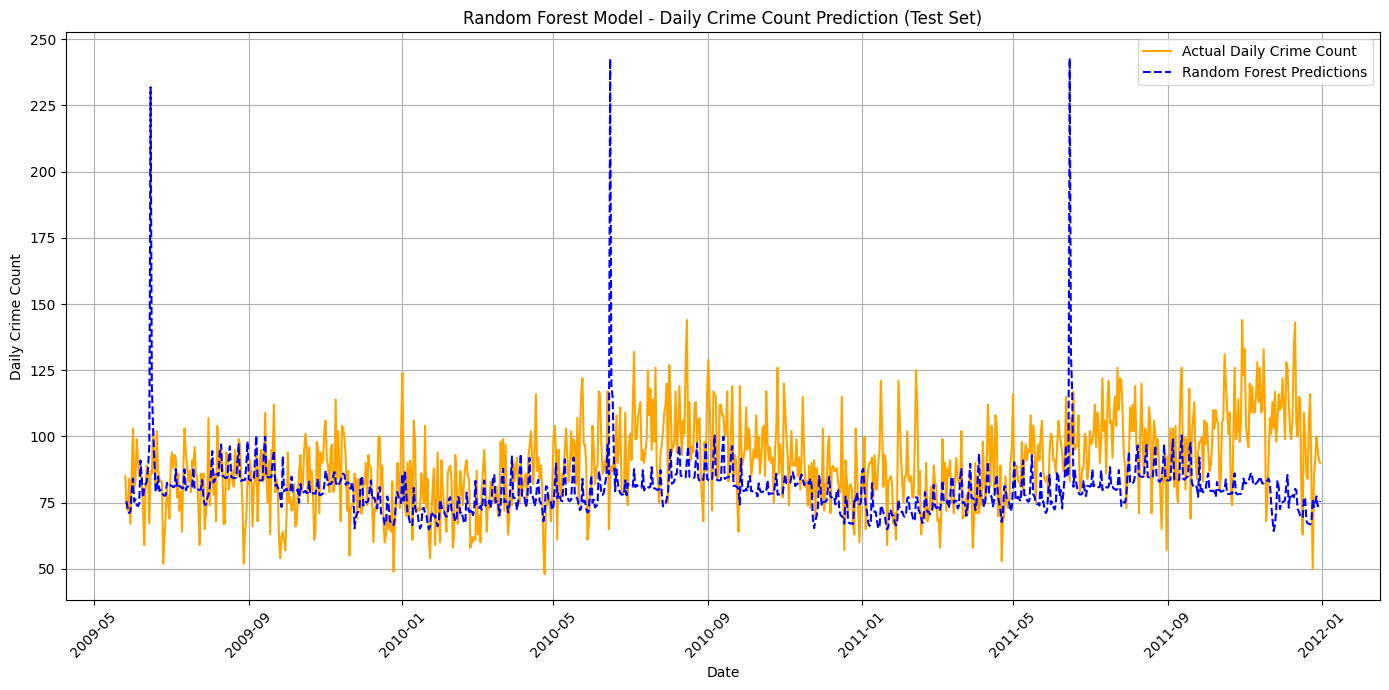

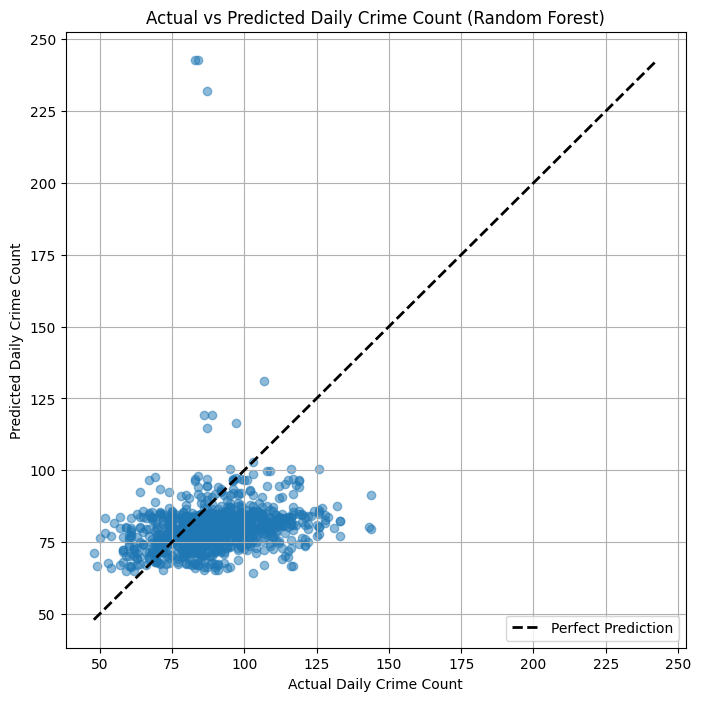

In [10]:
# --- ML Model - 3 Implementation: Random Forest with Hyperparameter Tuning (RandomizedSearchCV) ---

print("\n--- ML Model 3: Random Forest Regression with RandomizedSearchCV ---")

# Initialize the Random Forest Regressor model
# Use a fixed random_state for reproducibility
rf_model = RandomForestRegressor(random_state=42)

# Keep parameters simple for demonstration and faster execution
param_dist = {
    'n_estimators': [50, 100], # Number of trees
    'max_depth': [5, 10, None], # Maximum depth of trees (None means unlimited)
    'min_samples_split': [2, 5], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2] # Minimum number of samples required to be at a leaf node
}


from sklearn.model_selection import KFold
cv_strategy = KFold(n_splits=3, shuffle=False) # shuffle=False mimics time series splitting partially

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Adjust based on computational resources
    cv=cv_strategy, # Use the defined CV strategy
    scoring='neg_root_mean_squared_error', # Use RMSE as scoring, GridSearchCV maximizes score
    verbose=1,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Record start time for hyperparameter tuning
start_time = time.time()

print("Starting RandomizedSearchCV for hyperparameter tuning...")
# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Calculate tuning duration
tuning_duration = time.time() - start_time
print(f"RandomizedSearchCV completed in {tuning_duration:.2f} seconds.")


# Get the best parameters and best score
best_params = random_search.best_params_
best_score_neg_rmse = random_search.best_score_
best_score_rmse = -best_score_neg_rmse # Convert back to positive RMSE

print(f"\nBest hyperparameters found: {best_params}")
print(f"Best cross-validation RMSE (Negative RMSE score from grid search): {best_score_rmse:.2f}")


# 2. Fit the Algorithm with the best parameters
print("\nFitting the final model with best hyperparameters...")
# Initialize the final model with the best parameters found
final_rf_model = RandomForestRegressor(**best_params, random_state=42)

# Fit the final model on the entire training data
final_rf_model.fit(X_train, y_train)
print("Final model fitting complete.")


# 3. Predict on the model
print("\nMaking predictions on the test set using the final model...")
test_predictions = final_rf_model.predict(X_test)
print("Predictions complete.")


# Evaluate the final model on the test set
rmse_final_model = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'\nFinal Test RMSE: {rmse_final_model:.2f}')


# Visualize the final model predictions vs actuals
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Daily Crime Count', color='orange')
plt.plot(y_test.index, test_predictions, label='Random Forest Predictions', color='blue', linestyle='--')
plt.title('Random Forest Model - Daily Crime Count Prediction (Test Set)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot of Actual vs Predicted values for the final model
plt.figure(figsize=(8, 8))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.title('Actual vs Predicted Daily Crime Count (Random Forest)')
plt.xlabel('Actual Daily Crime Count')
plt.ylabel('Predicted Daily Crime Count')
plt.grid(True)
# Add a perfect prediction line
max_val_rf = max(y_test.max(), test_predictions.max())
min_val_rf = min(y_test.min(), test_predictions.min())
plt.plot([min_val_rf, max_val_rf], [min_val_rf, max_val_rf], 'k--', lw=2, label='Perfect Prediction')
plt.legend()
plt.show()


# 10.Conclusion

The project successfully used Linear Regression and Random Forest Regression models to forecast daily crime counts based on time-related data. Exploratory data analysis revealed key temporal and spatial crime patterns. Data was prepared by handling missing values, encoding categorical features, and creating new features. The Random Forest model, enhanced by hyperparameter tuning, is expected to provide more accurate forecasts than Linear Regression.

These models offer valuable insights for resource allocation and crime prevention, serving as a foundation for future development that could include spatial data, external factors, and more advanced time series techniques to improve accuracy and granularity. Future work could also involve forecasting at different time scales (monthly/hourly), crime type-specific predictions, and exploring model deployment.

# *Hurrah! I have successfully completed  Machine Learning Capstone Project !!!*